In [1]:
from qiskit import *
from qiskit_aer import AerSimulator
import numpy as np
from qiskit_aer.noise import NoiseModel, depolarizing_error
#from qiskit_experiments import *
from qiskit.quantum_info import state_fidelity
from copy import deepcopy
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime import QiskitRuntimeService

#### Contrução do circuito

In [2]:
def function_teleport(n=0):
    # Registradores quânticos
    Secret = QuantumRegister(1, 'Secret')
    Alice = QuantumRegister(1, 'Alice')
    Bob = QuantumRegister(1, 'Bob')
    c = ClassicalRegister(3, 'c')  

    circuit = QuantumCircuit(Secret,Alice,Bob,c)

    if n > 0:
        ext = QuantumRegister(n, 'ext')
        circuit = QuantumCircuit(Secret, Alice, Bob, ext, c)
    else:
        circuit = QuantumCircuit(Secret, Alice, Bob, c)

    circuit.h(Alice)
    circuit.cx(Alice, Bob)
    circuit.barrier()

    if n > 0:
        circuit.swap(Bob[0], ext[0])
        for i in range(1, n):
            circuit.swap(ext[i - 1], ext[i])
        final_target = ext[n - 1]
    else:
        final_target = Bob[0]

    circuit.barrier()
    circuit.h(Secret)
    circuit.barrier()

    circuit.cx(Secret, Alice)
    circuit.h(Secret)
    circuit.barrier()

    circuit.measure(Alice, c[0])
    circuit.measure(Secret, c[1])
    circuit.barrier()

    with circuit.if_test((c[1], 1)):  # Alice
        circuit.x(final_target)
    with circuit.if_test((c[0], 1)):  # Secret
        circuit.z(final_target)

    circuit.h(final_target)
    circuit.measure(final_target, c[2])

    circuit.draw('mpl')

    return circuit


=== Circuito com 0 SWAPs ===


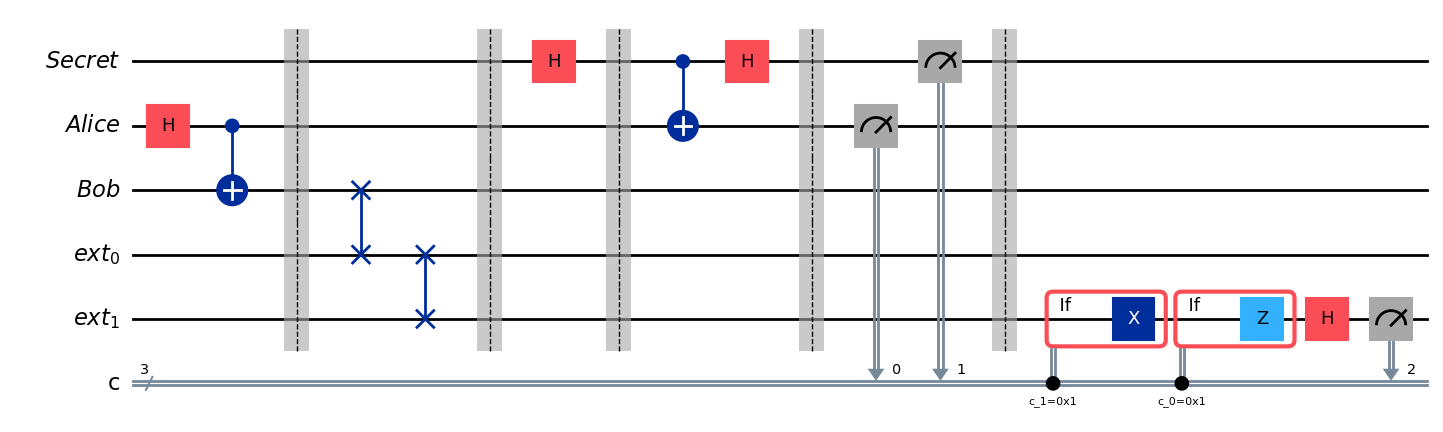


=== Circuito com 1 SWAPs ===


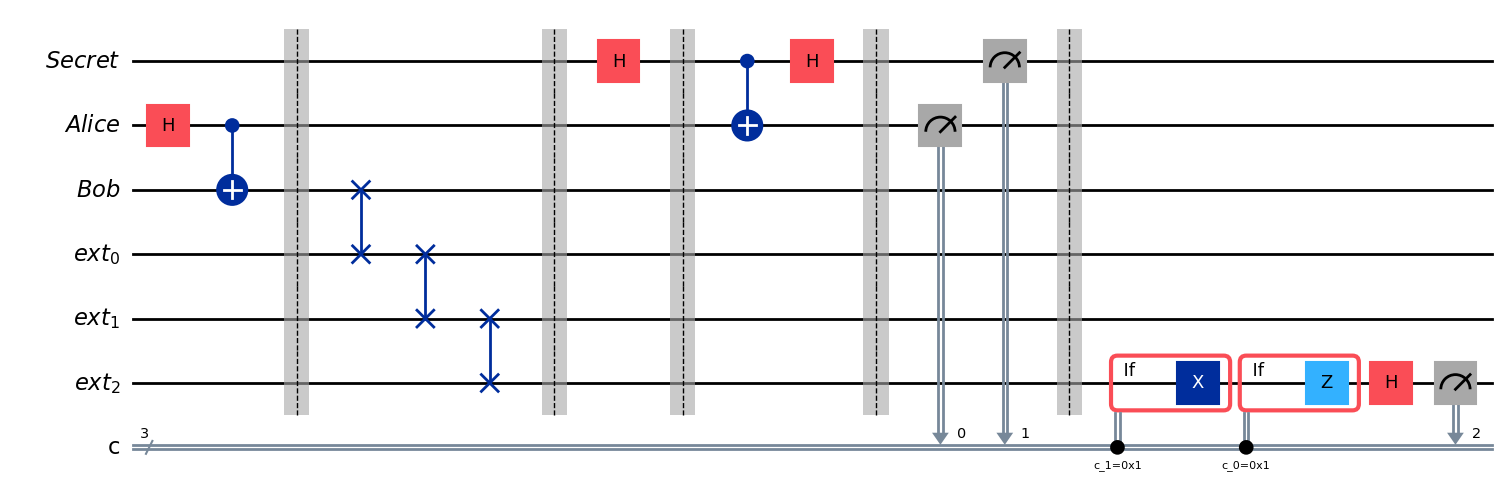


=== Circuito com 2 SWAPs ===


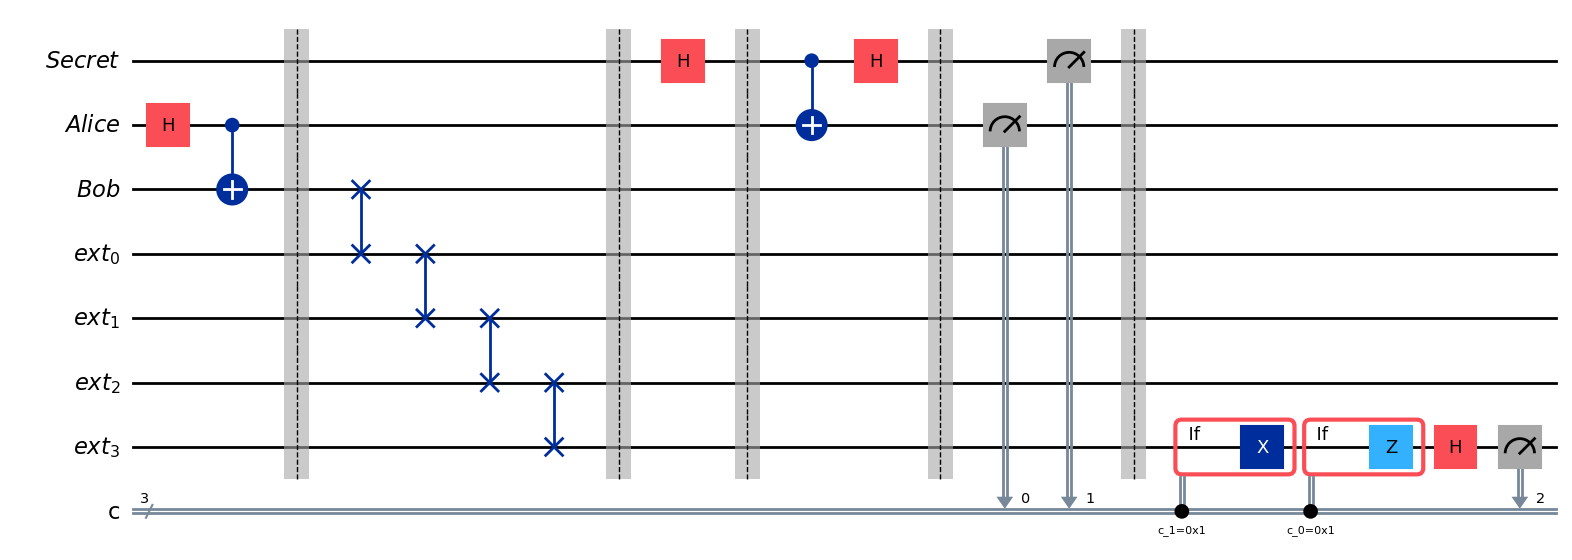


=== Circuito com 3 SWAPs ===


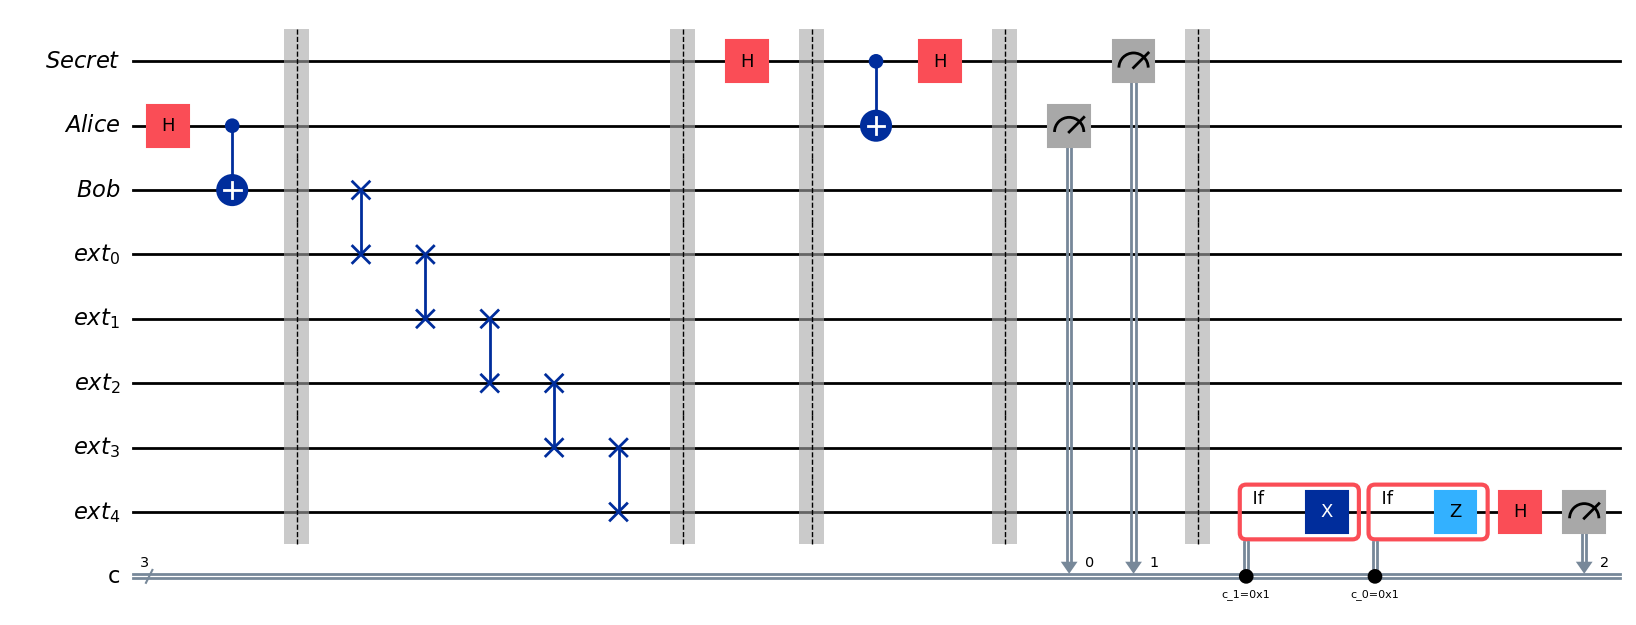


=== Circuito com 4 SWAPs ===


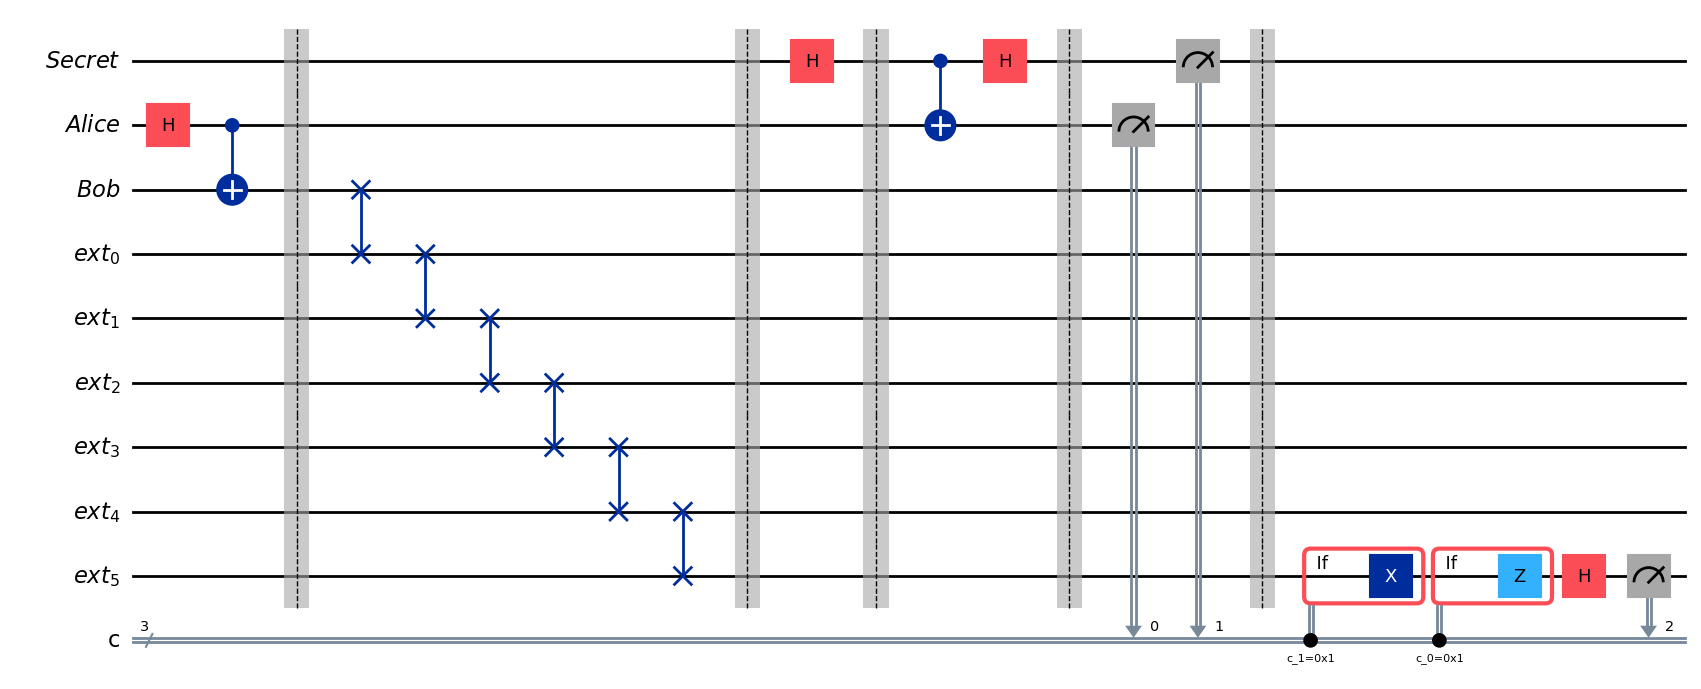


=== Circuito com 5 SWAPs ===


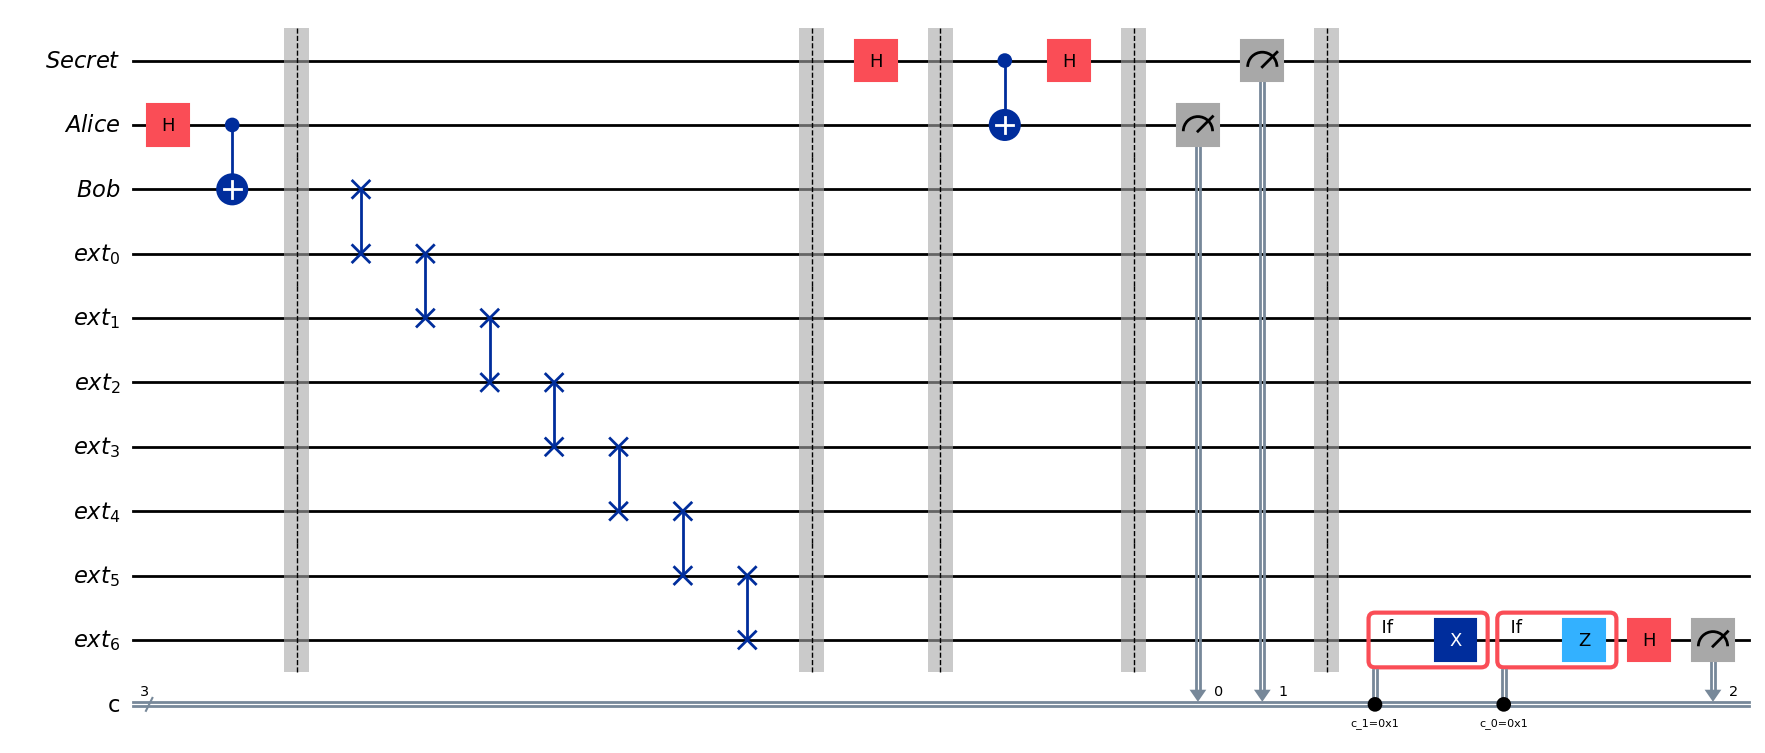


=== Circuito com 6 SWAPs ===


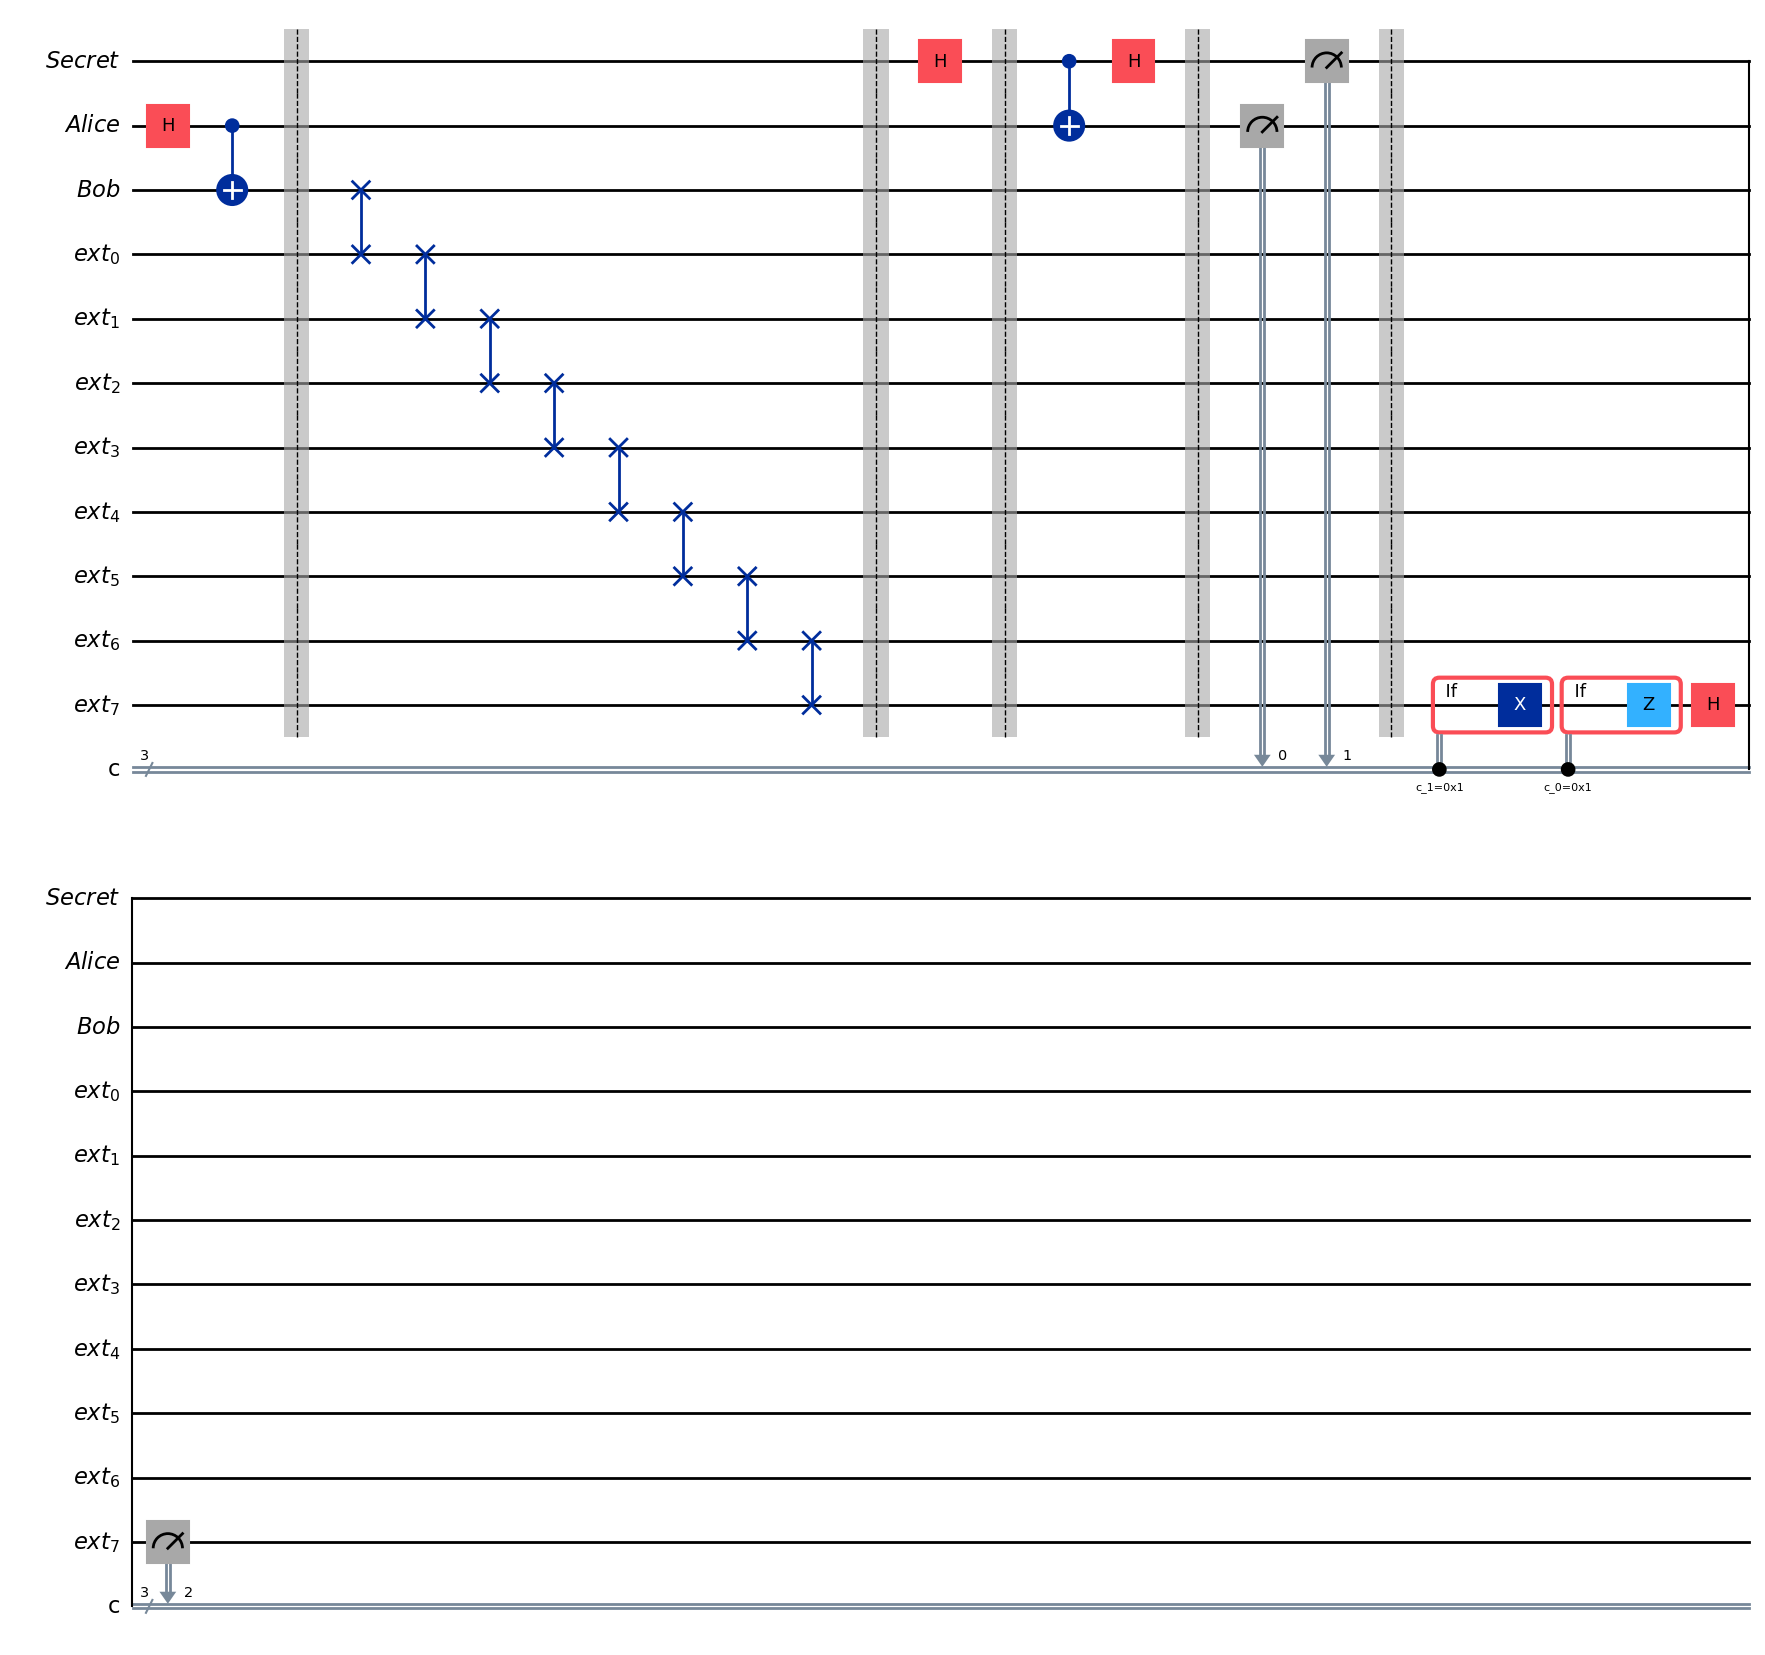


=== Circuito com 7 SWAPs ===


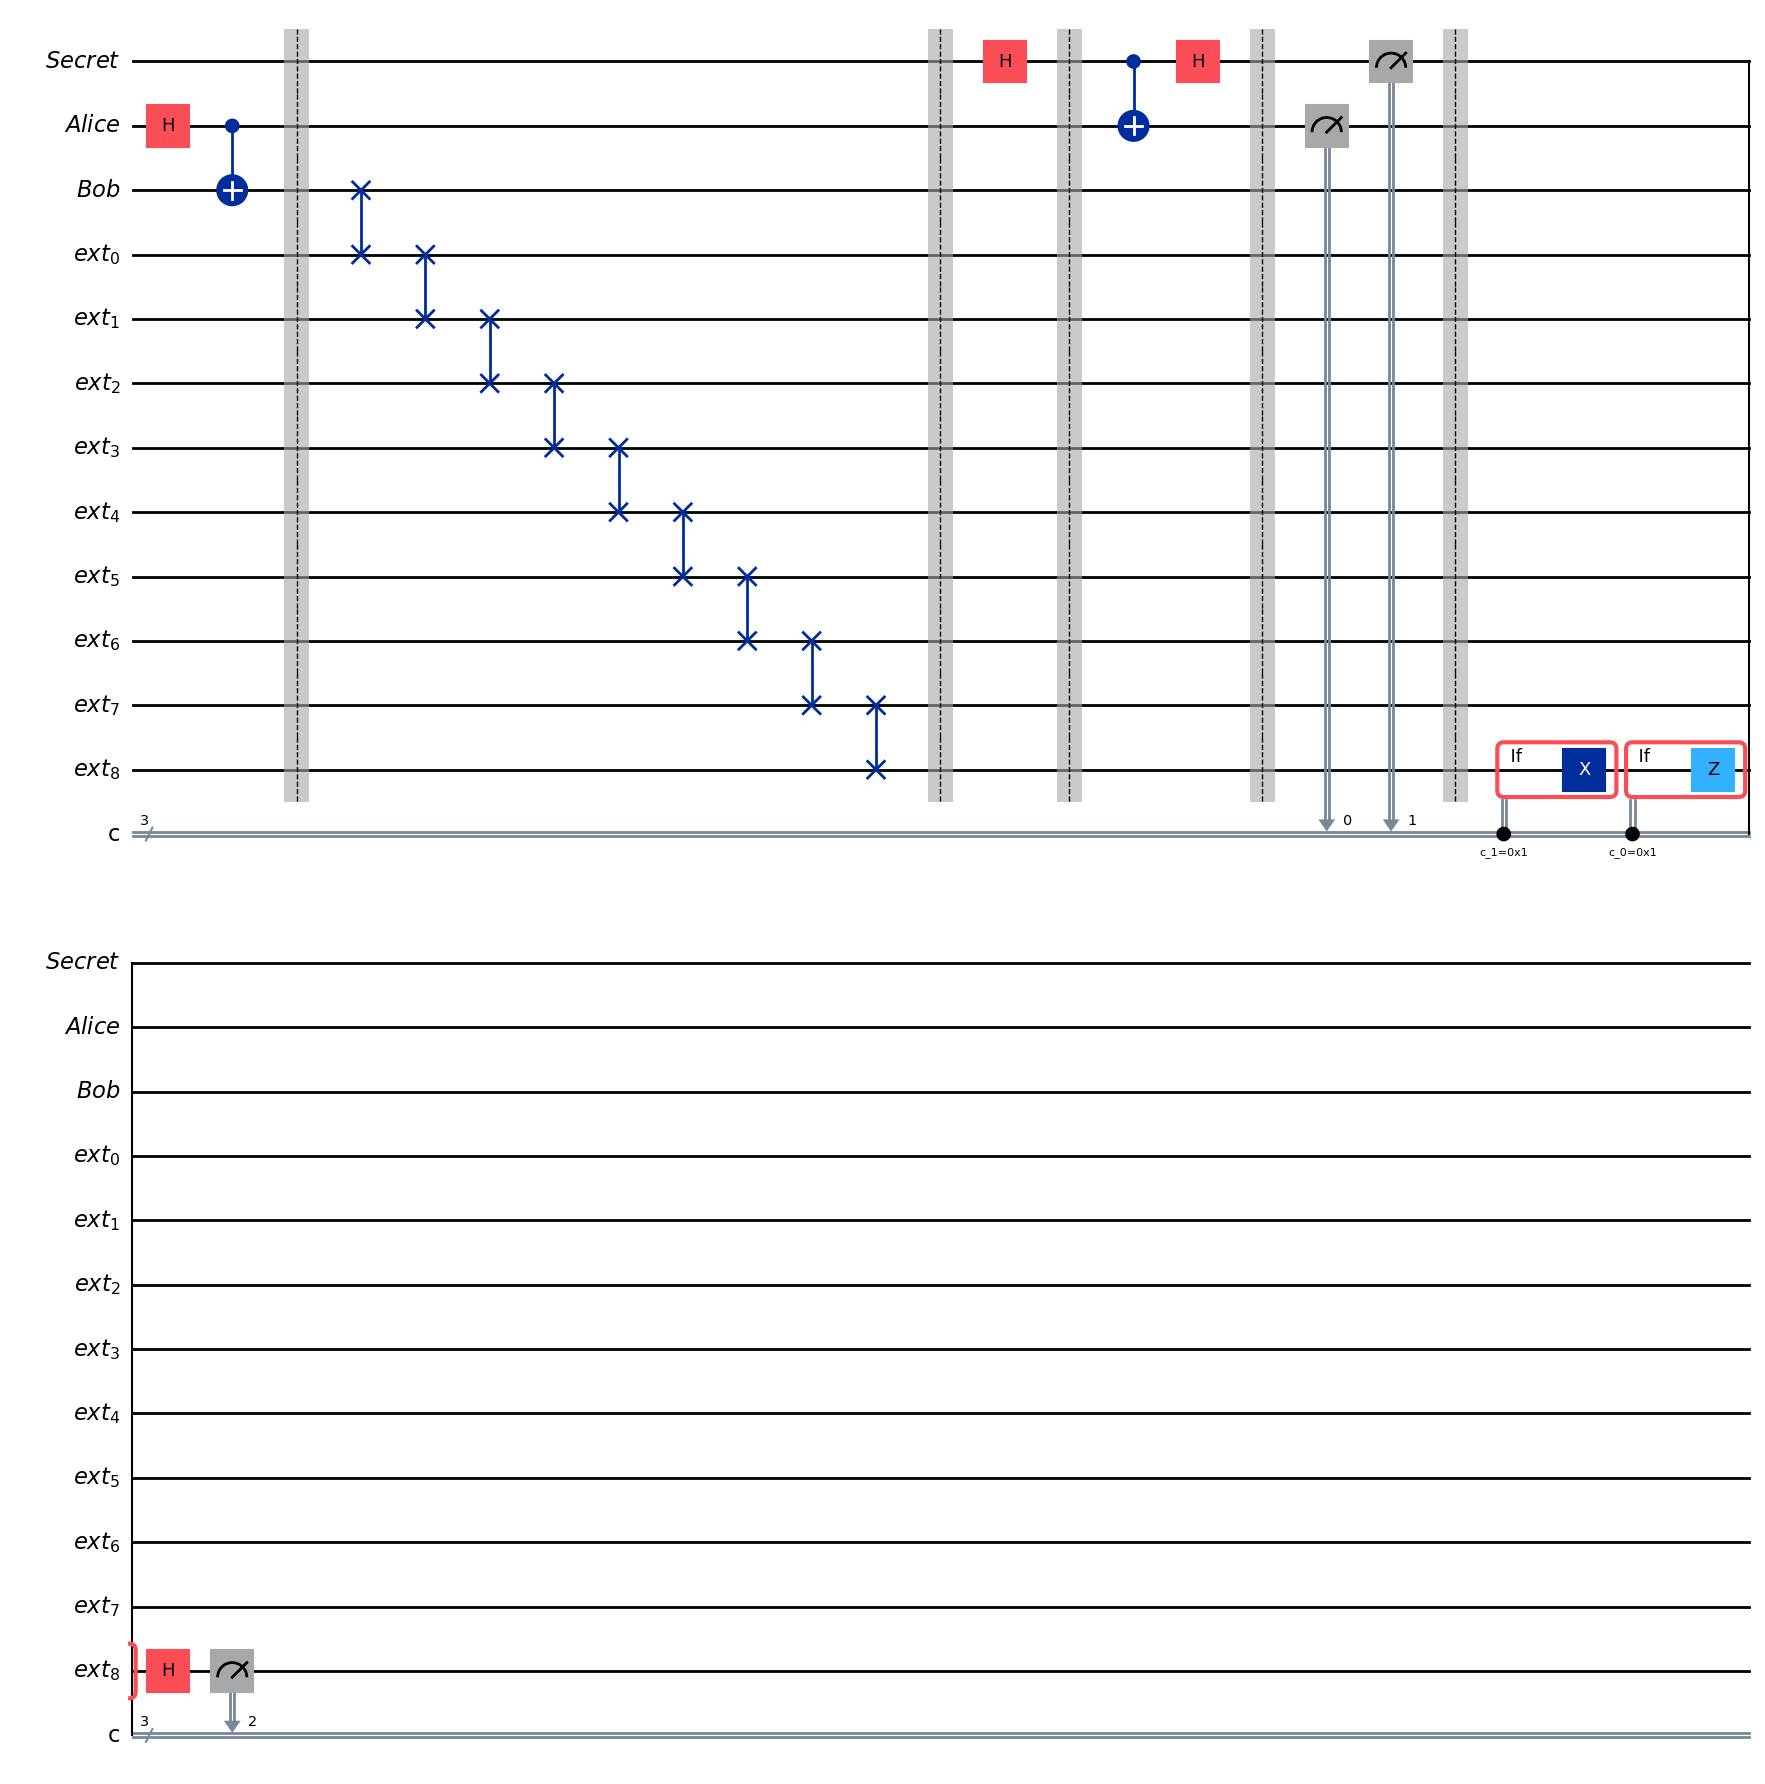


=== Circuito com 8 SWAPs ===


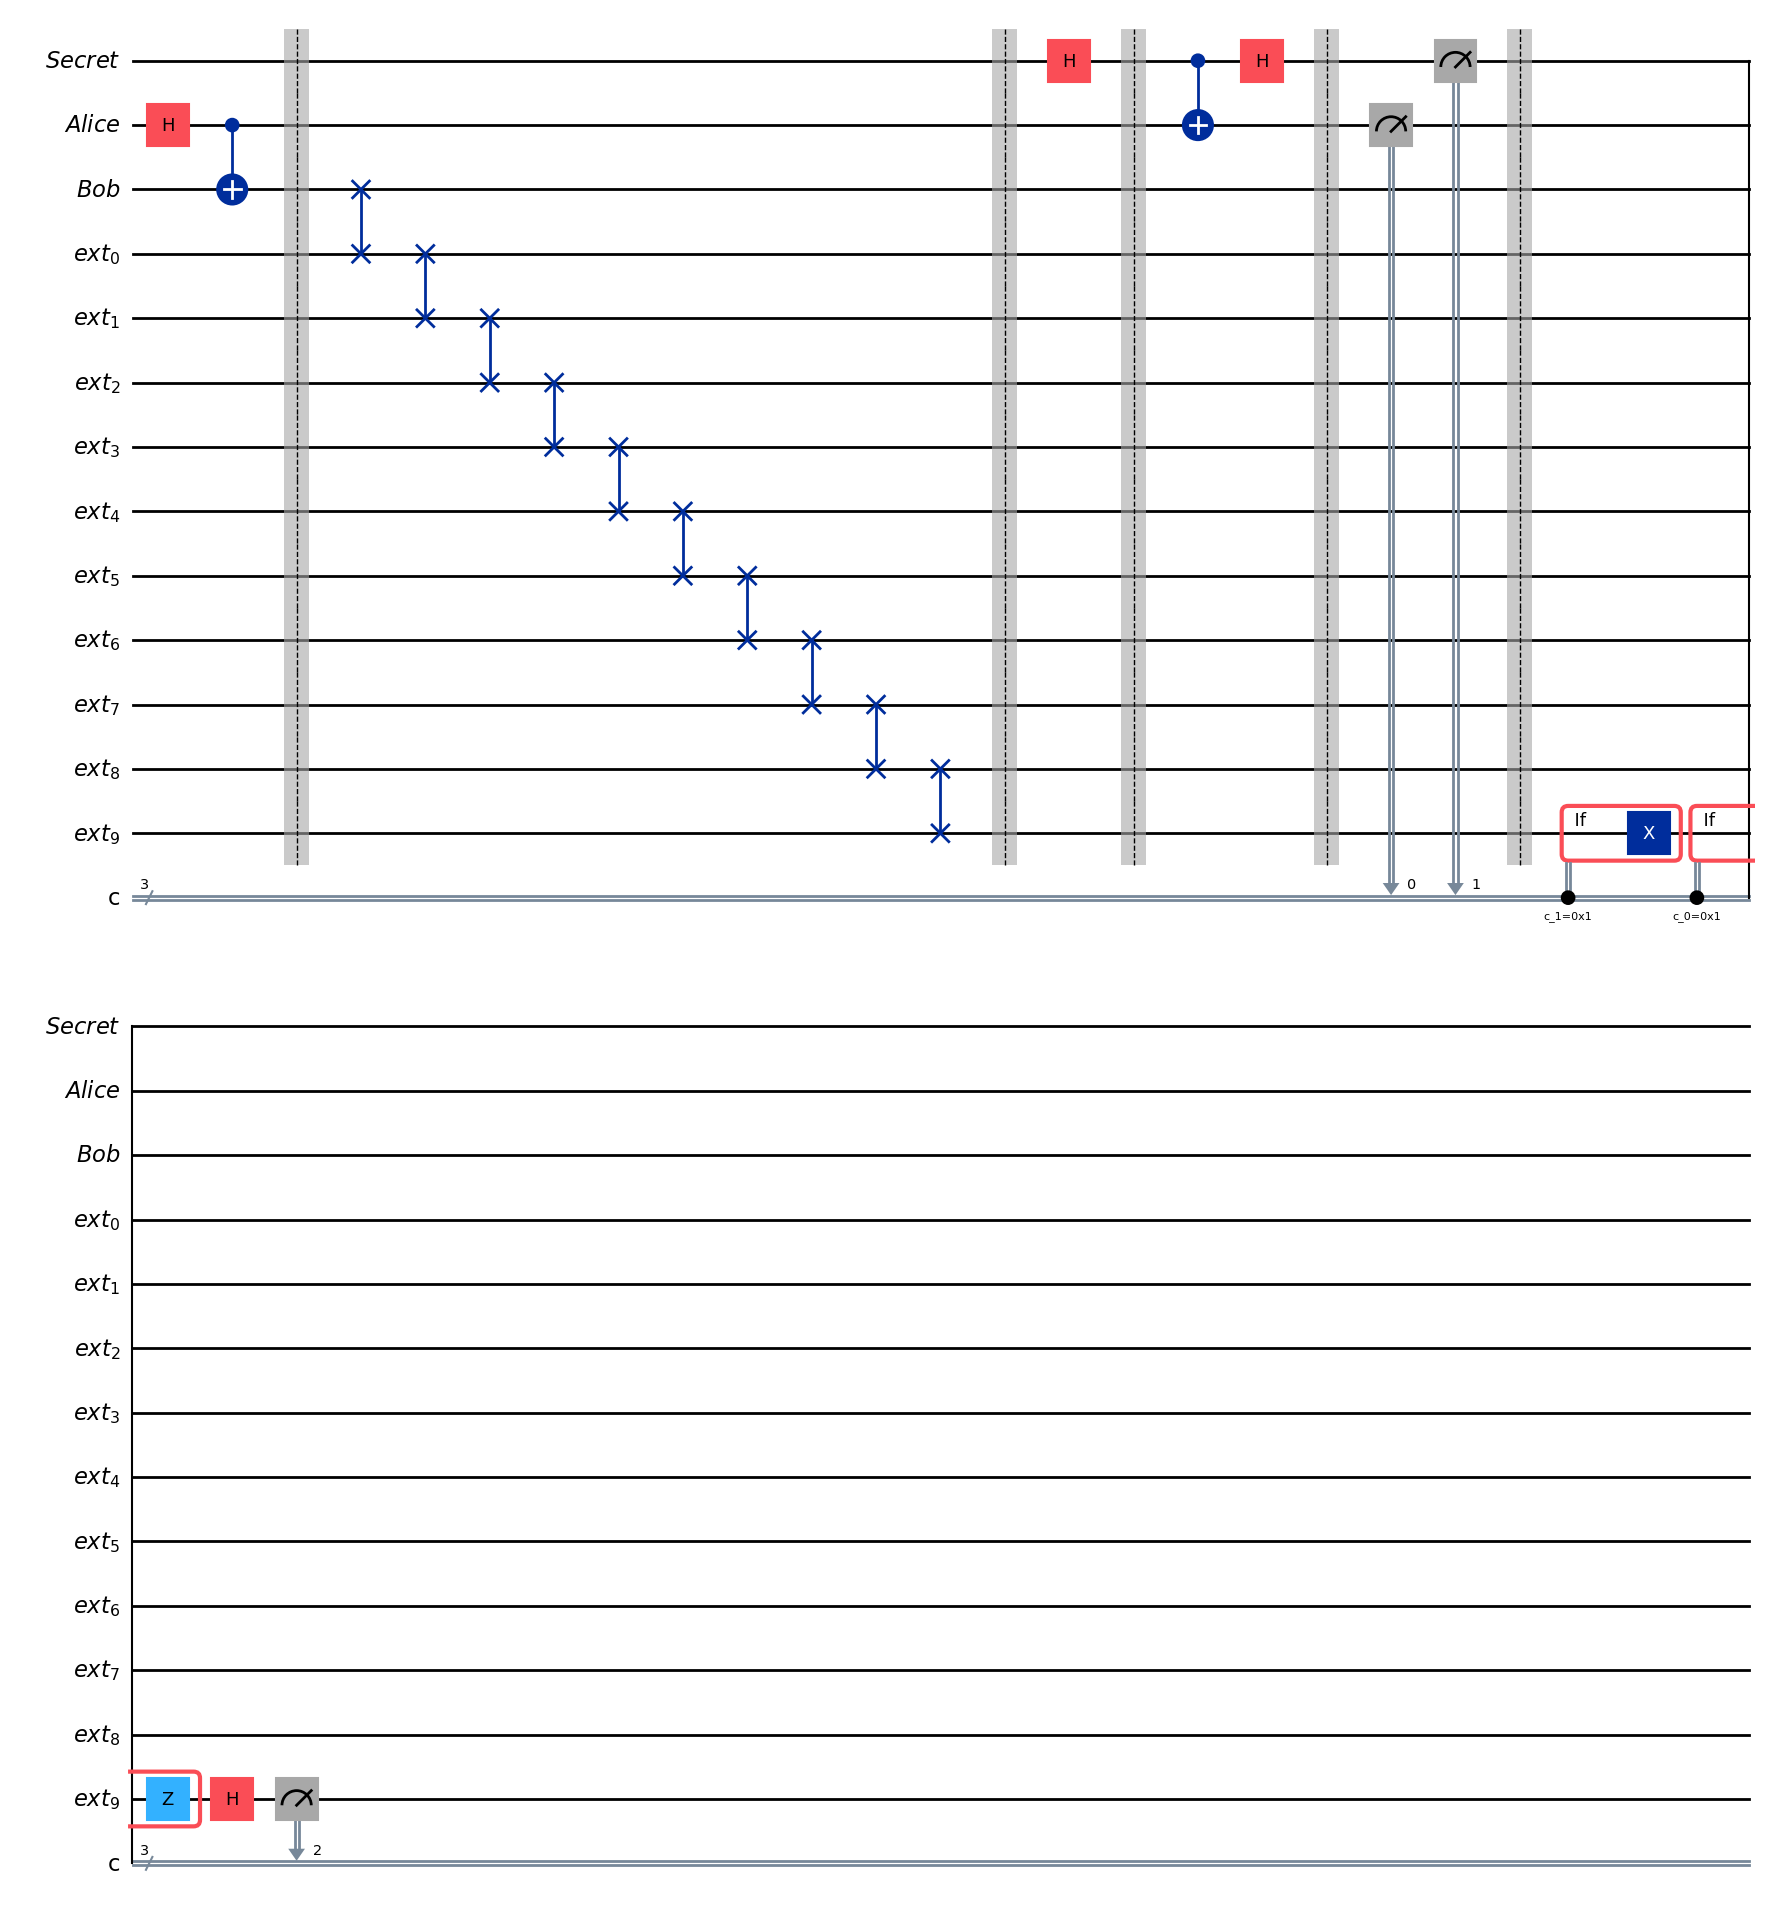


=== Circuito com 9 SWAPs ===


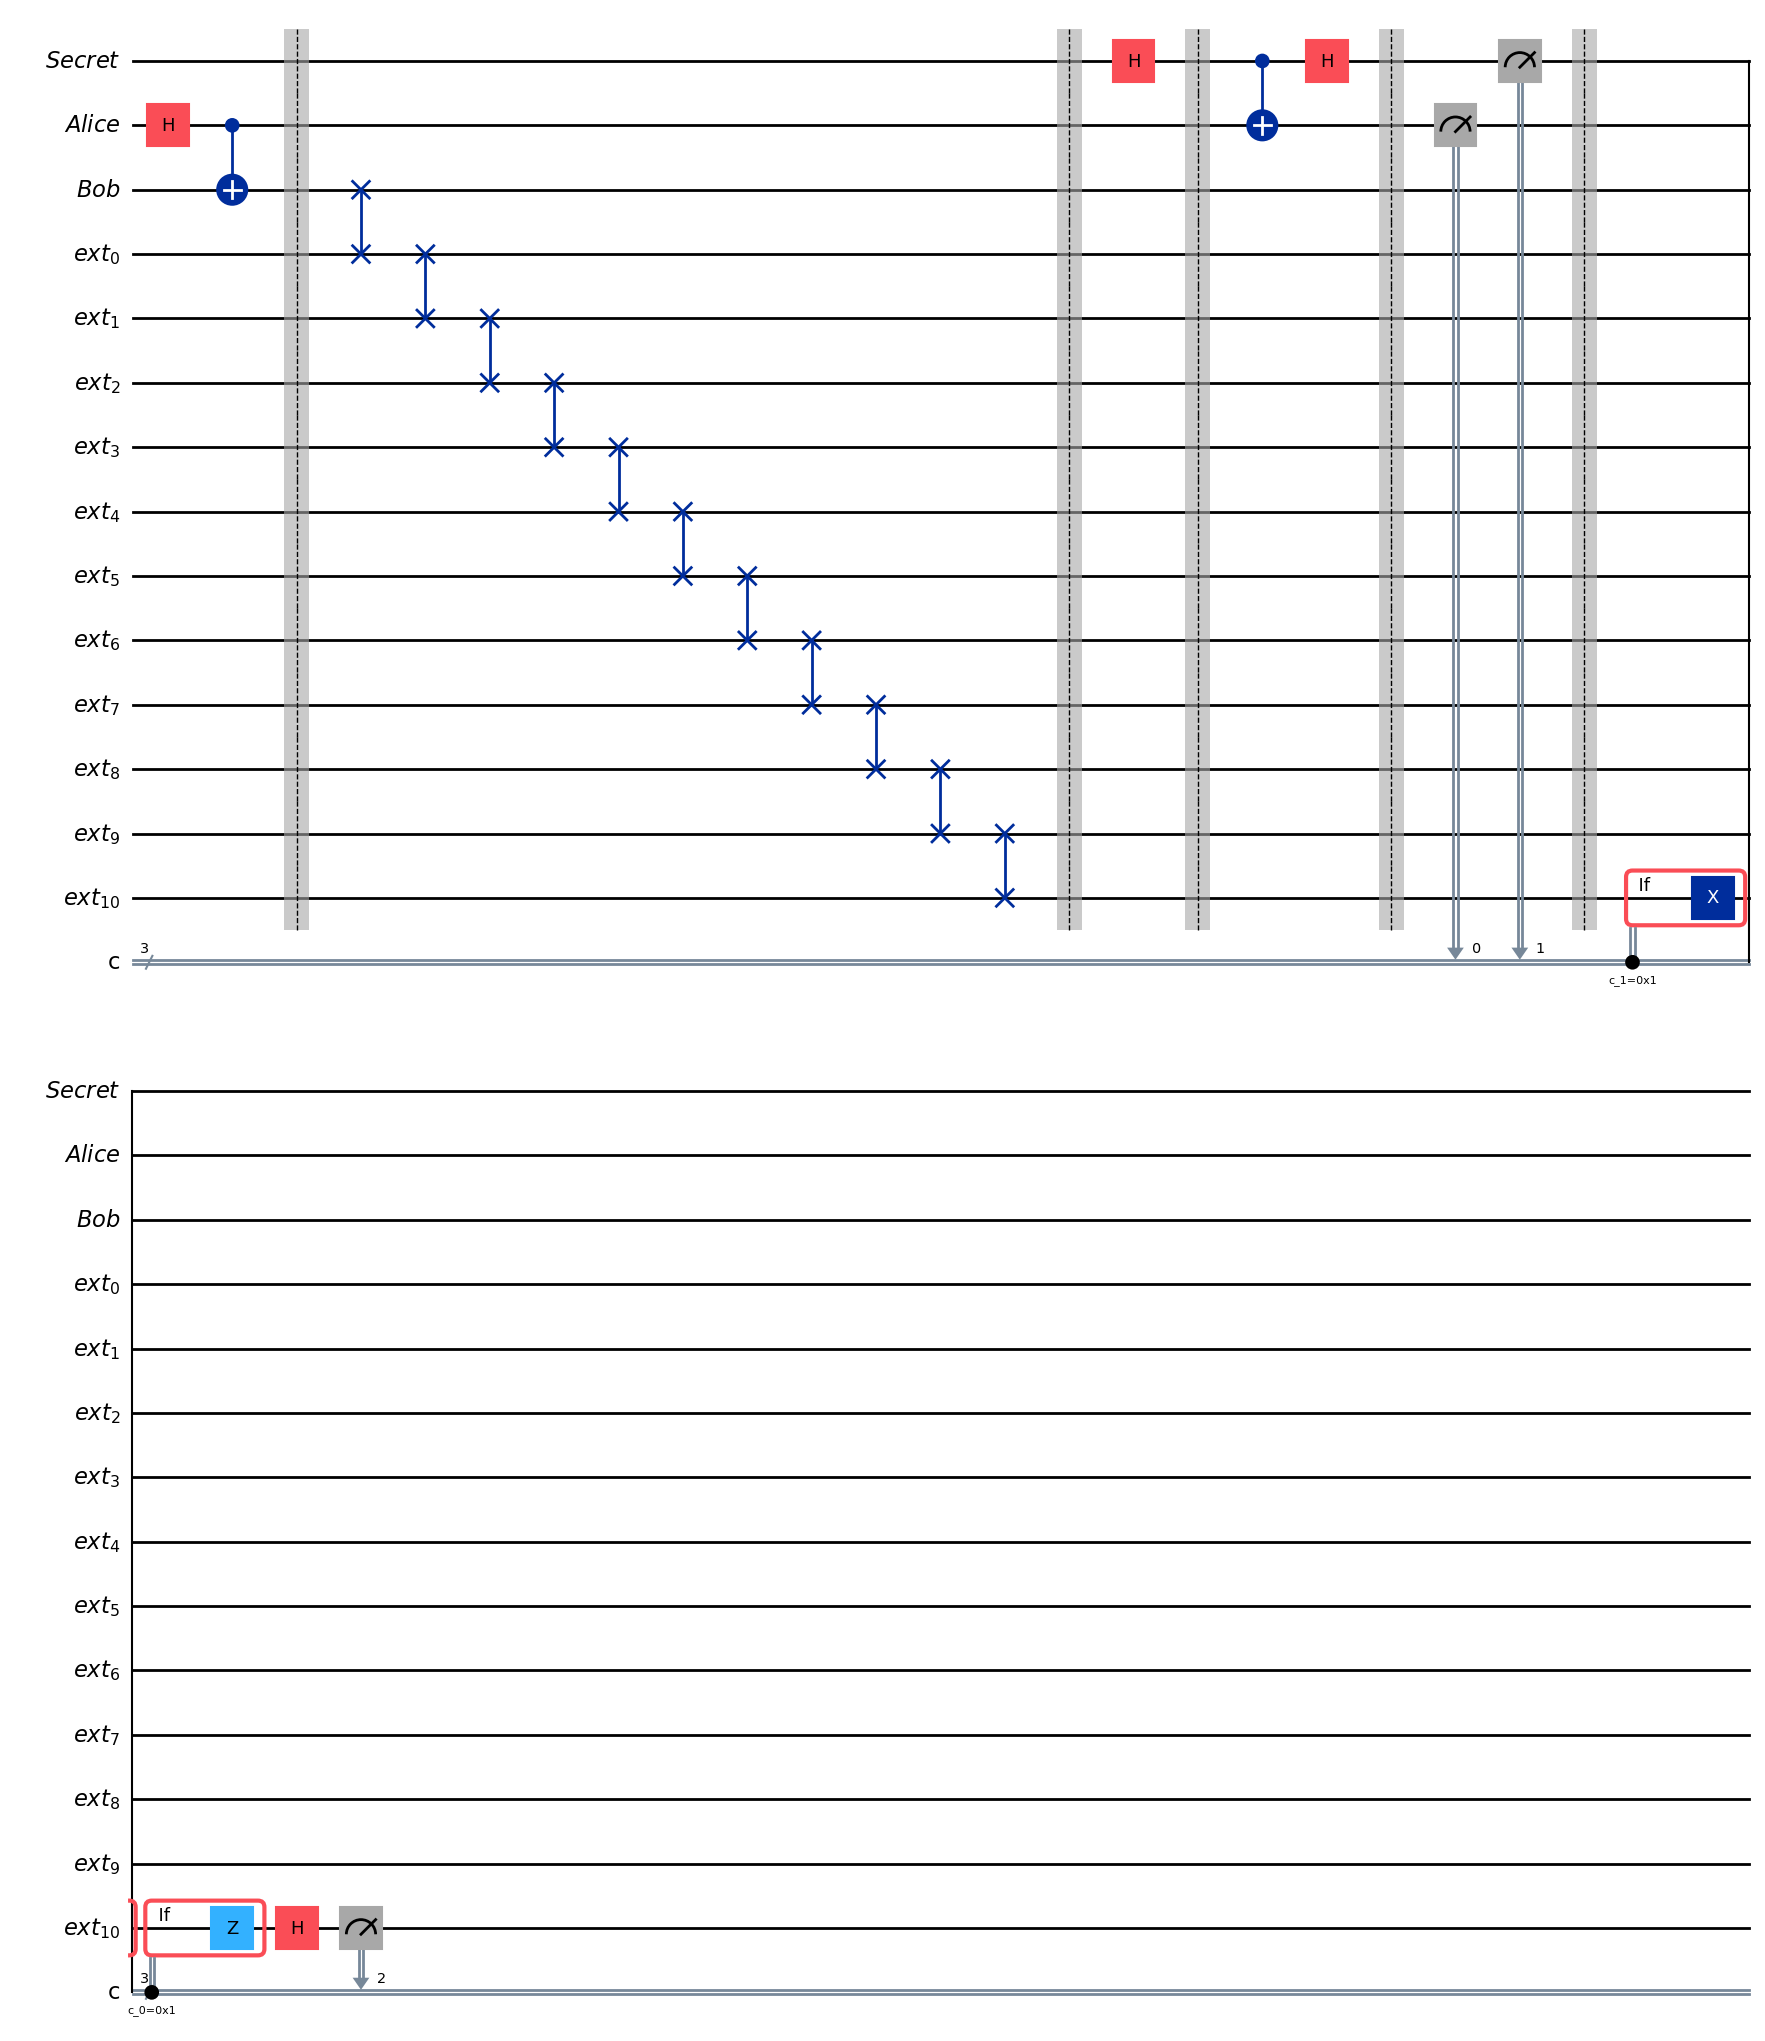


=== Circuito com 10 SWAPs ===


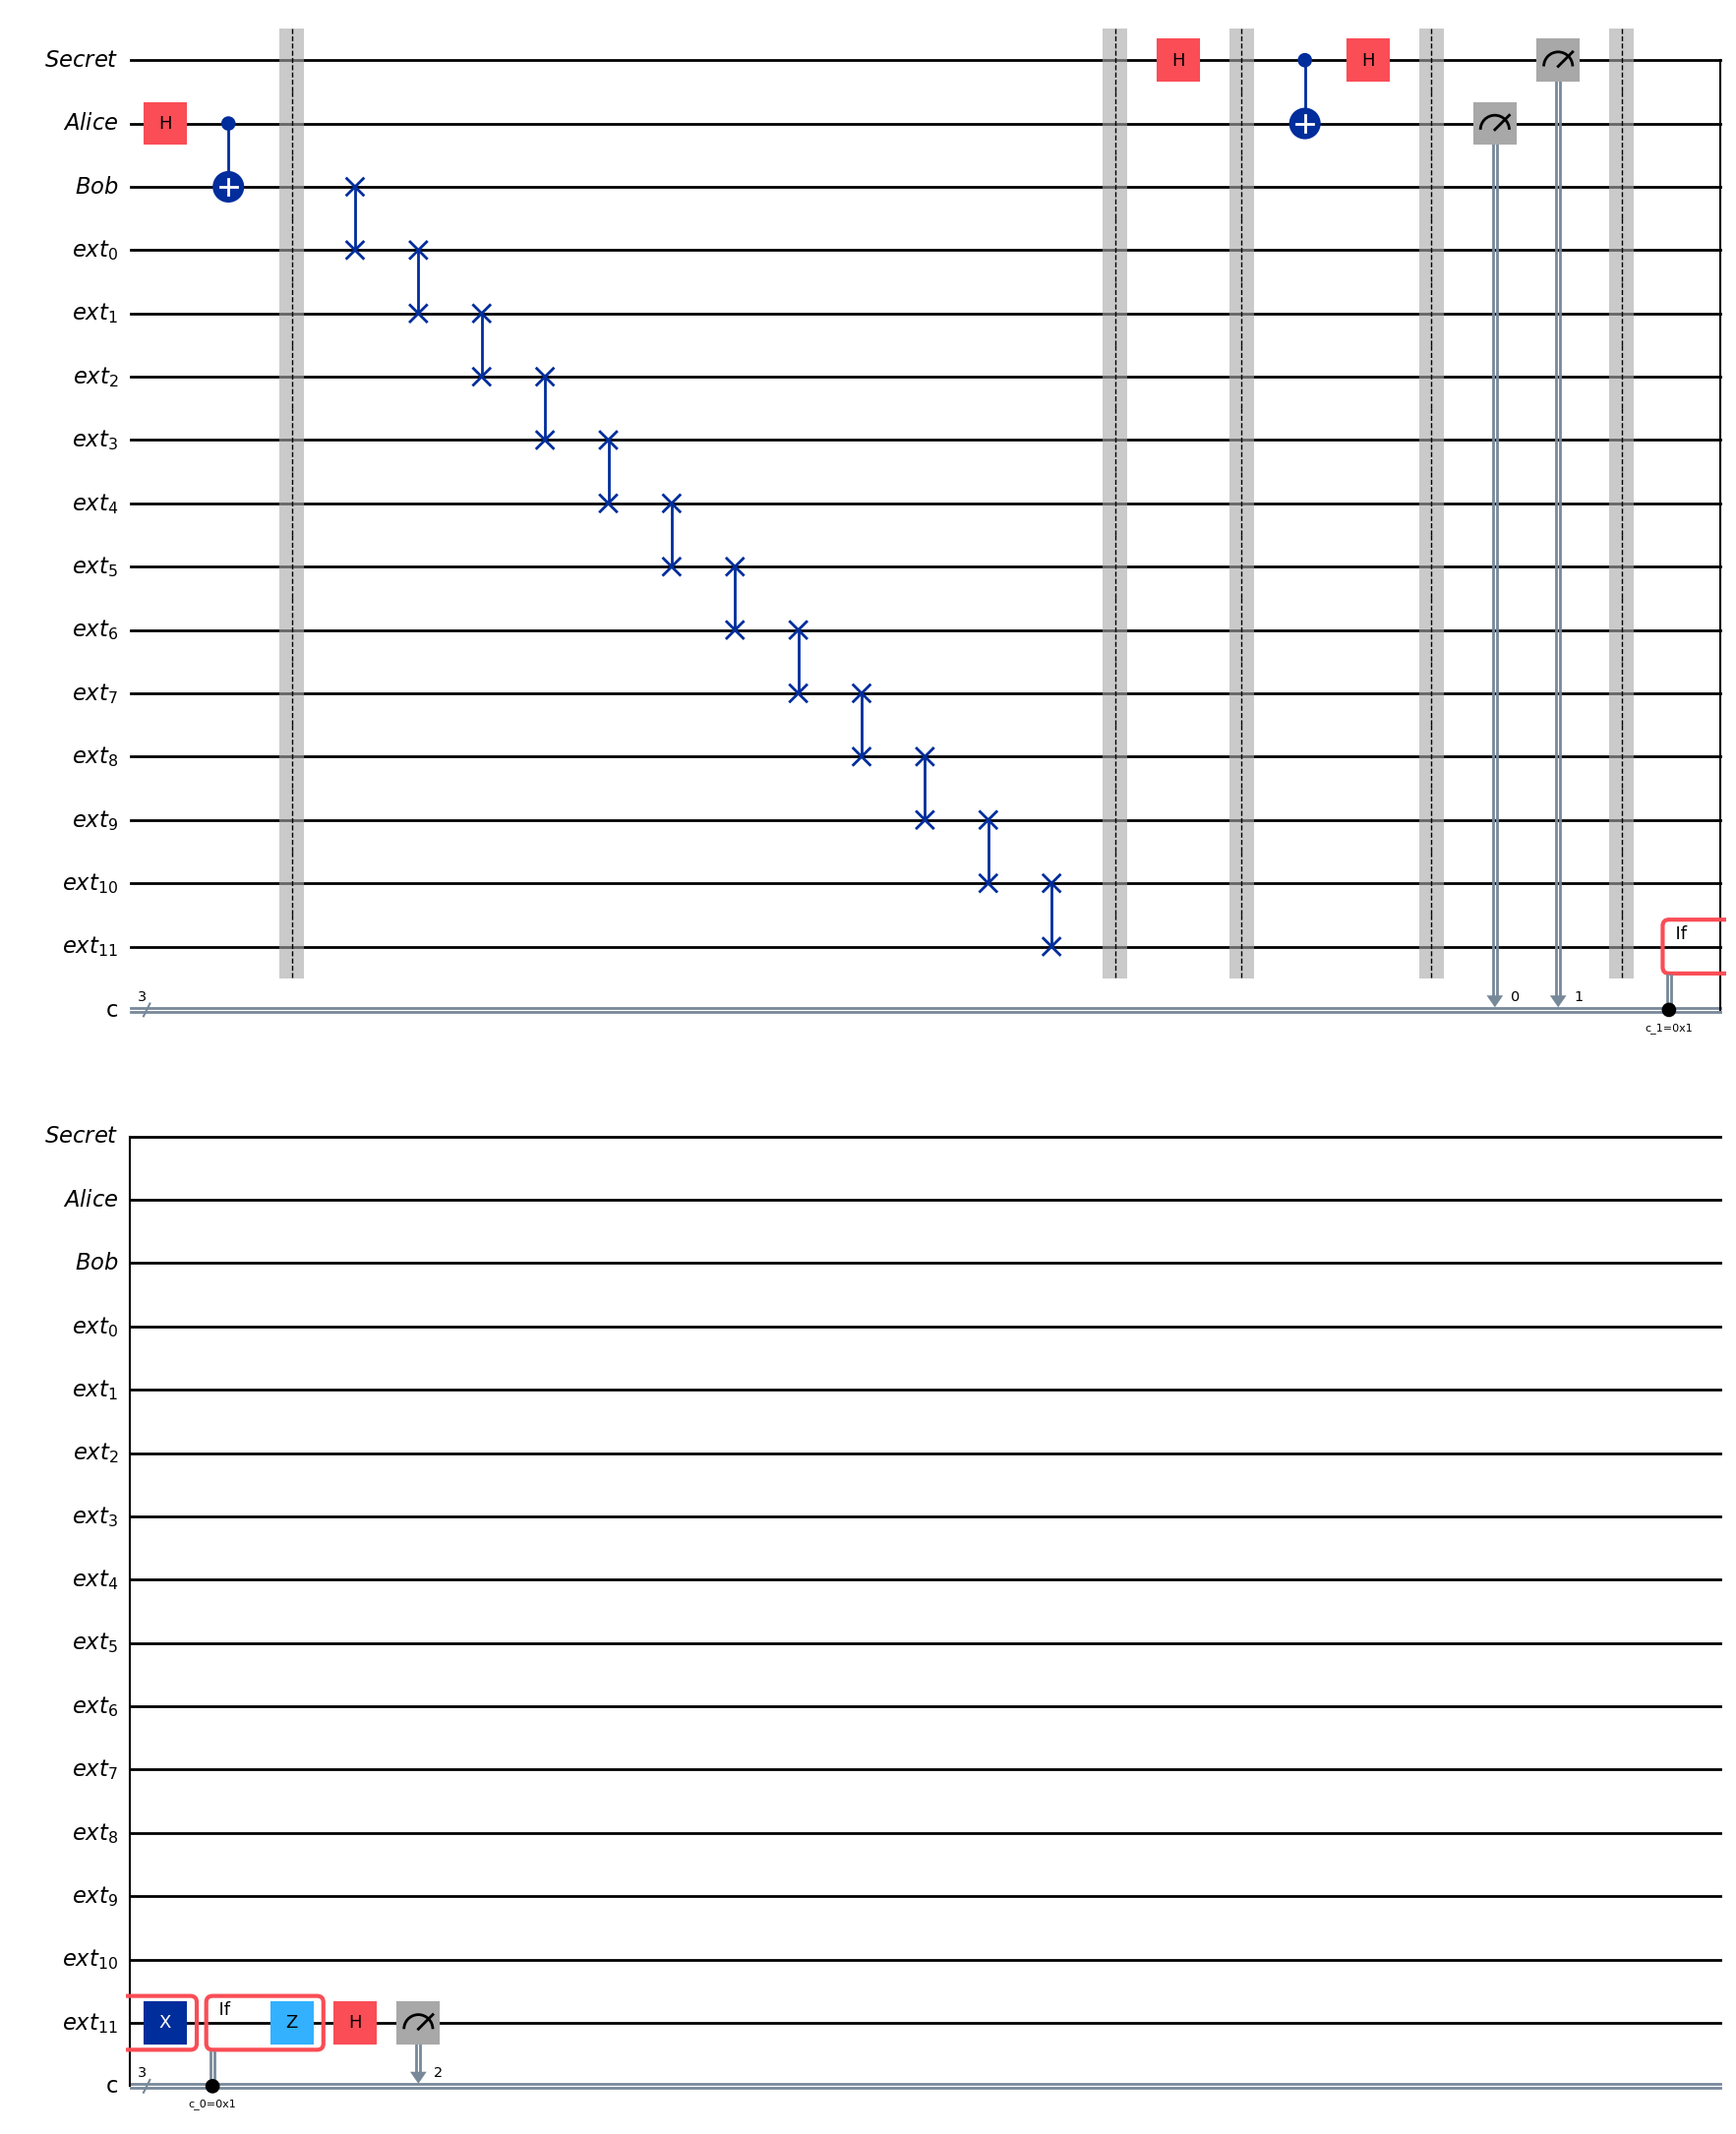


=== Circuito com 11 SWAPs ===


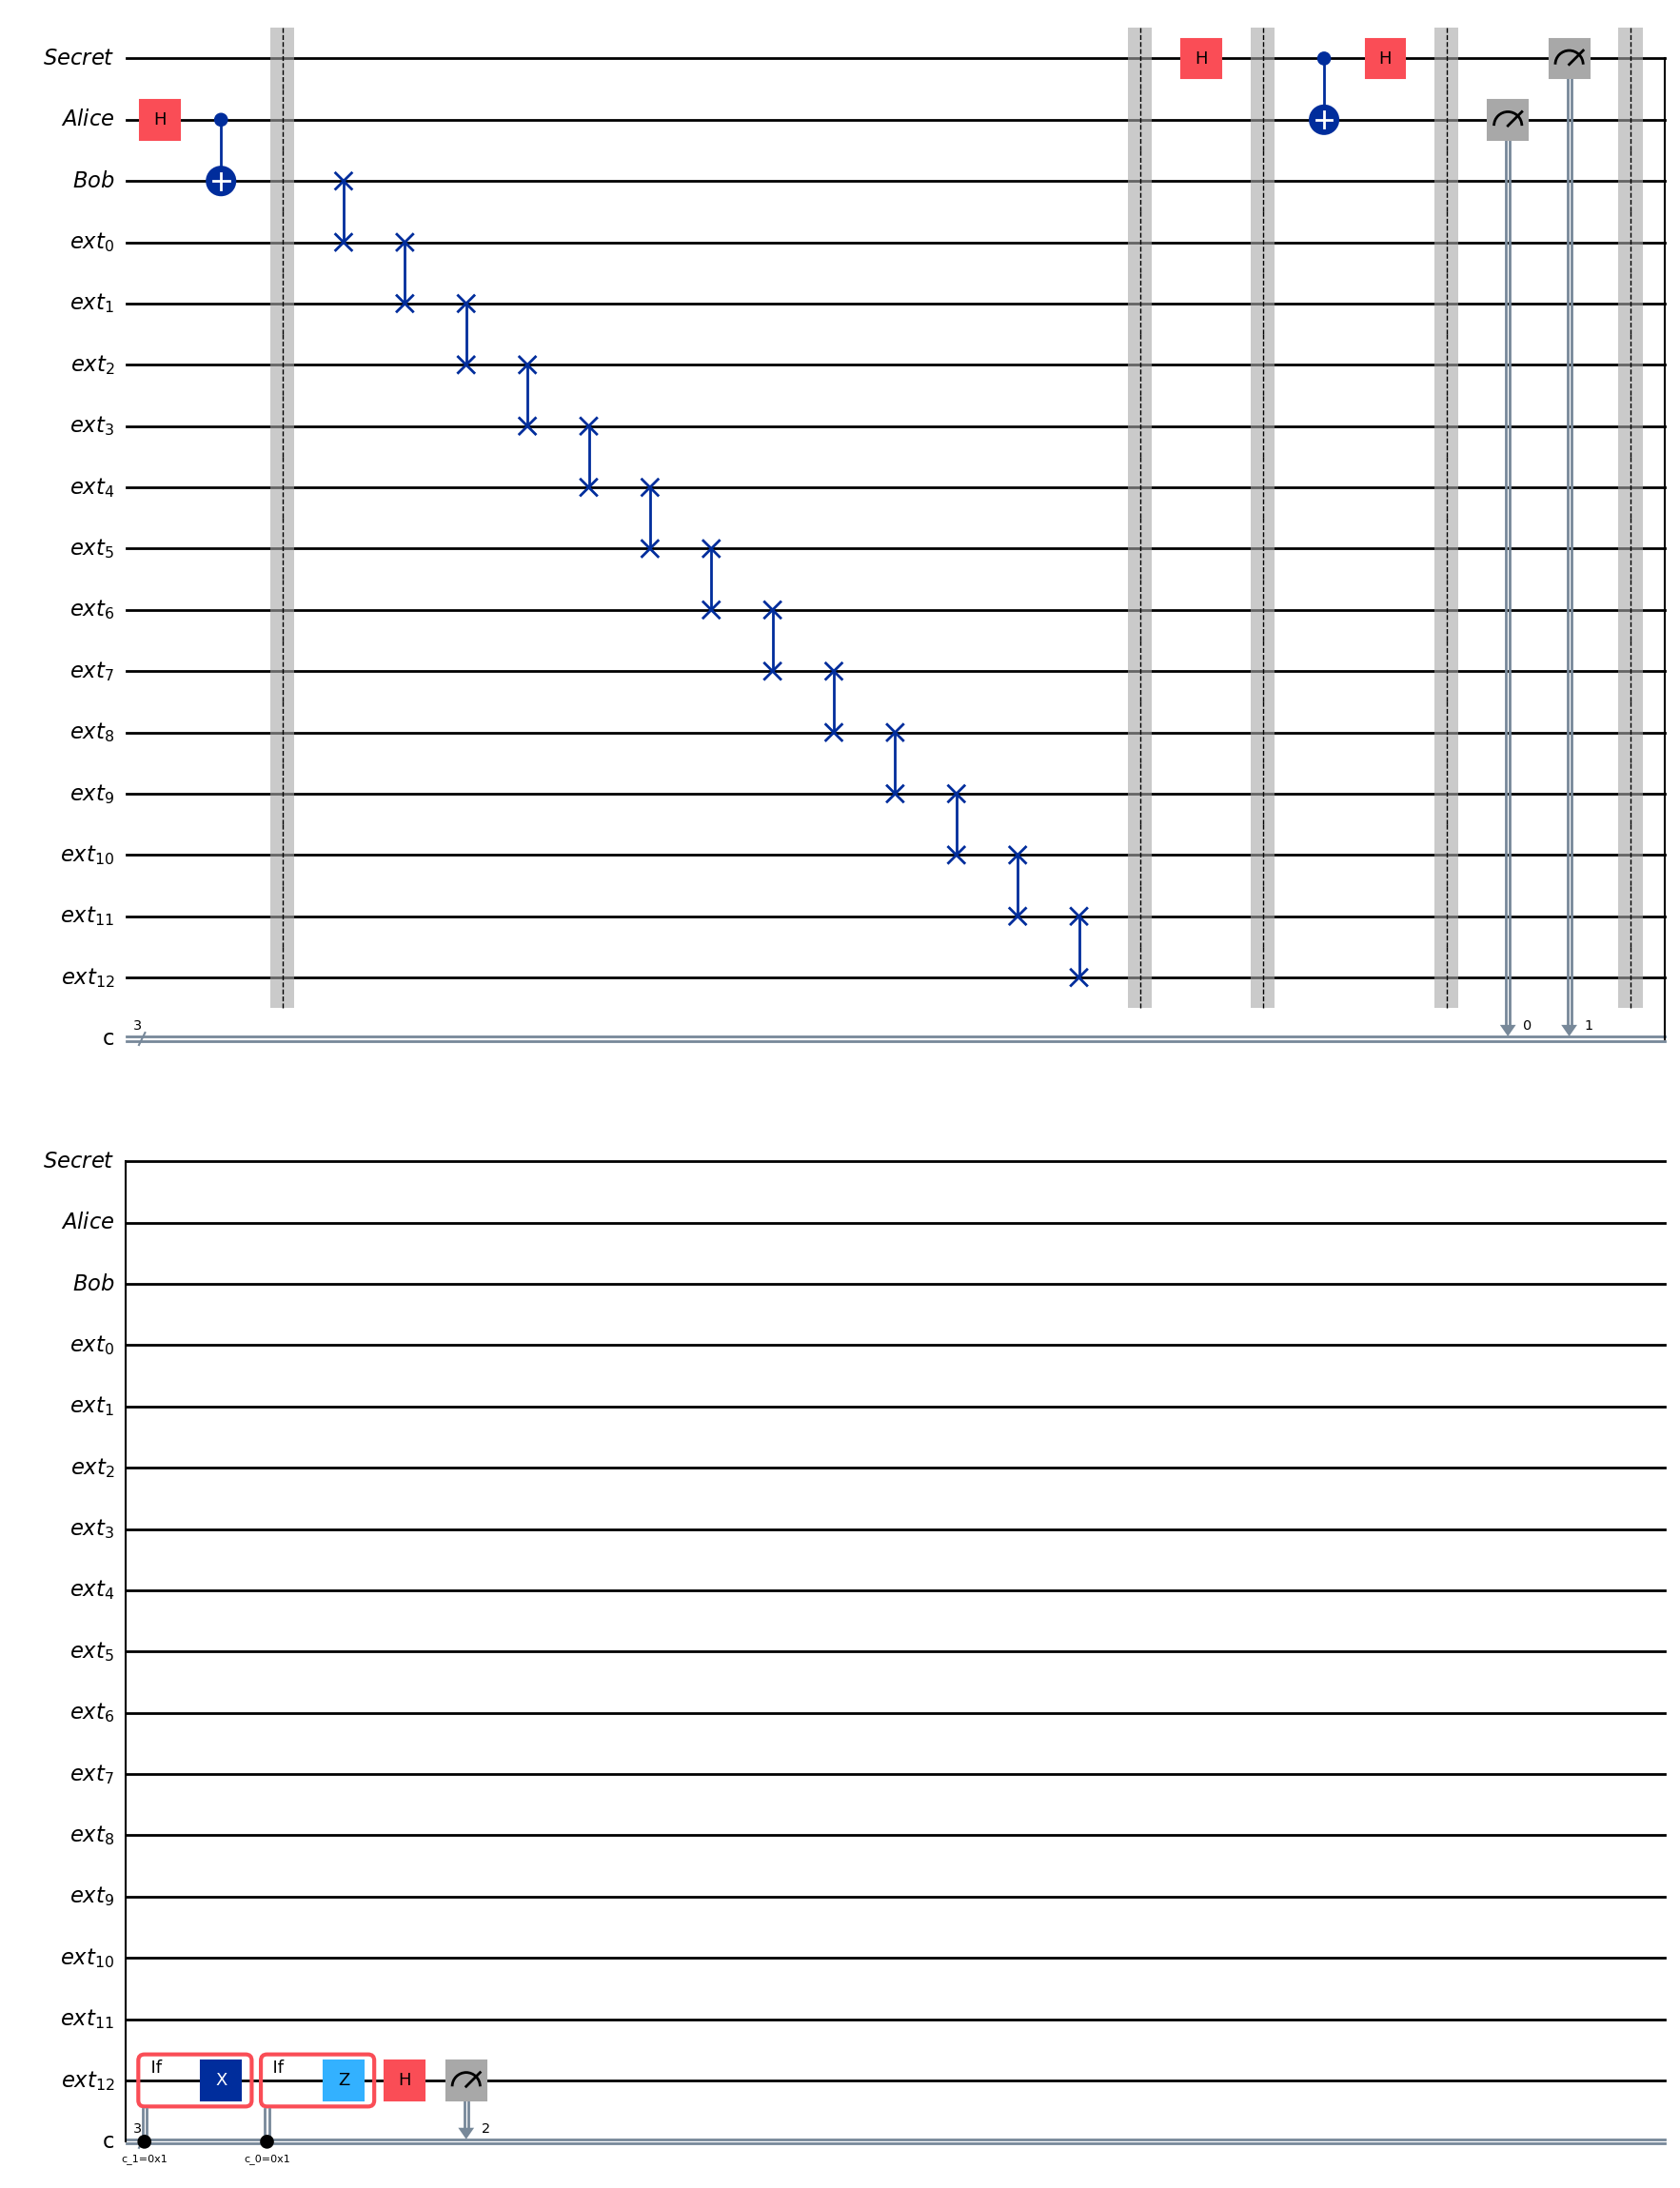


=== Circuito com 12 SWAPs ===


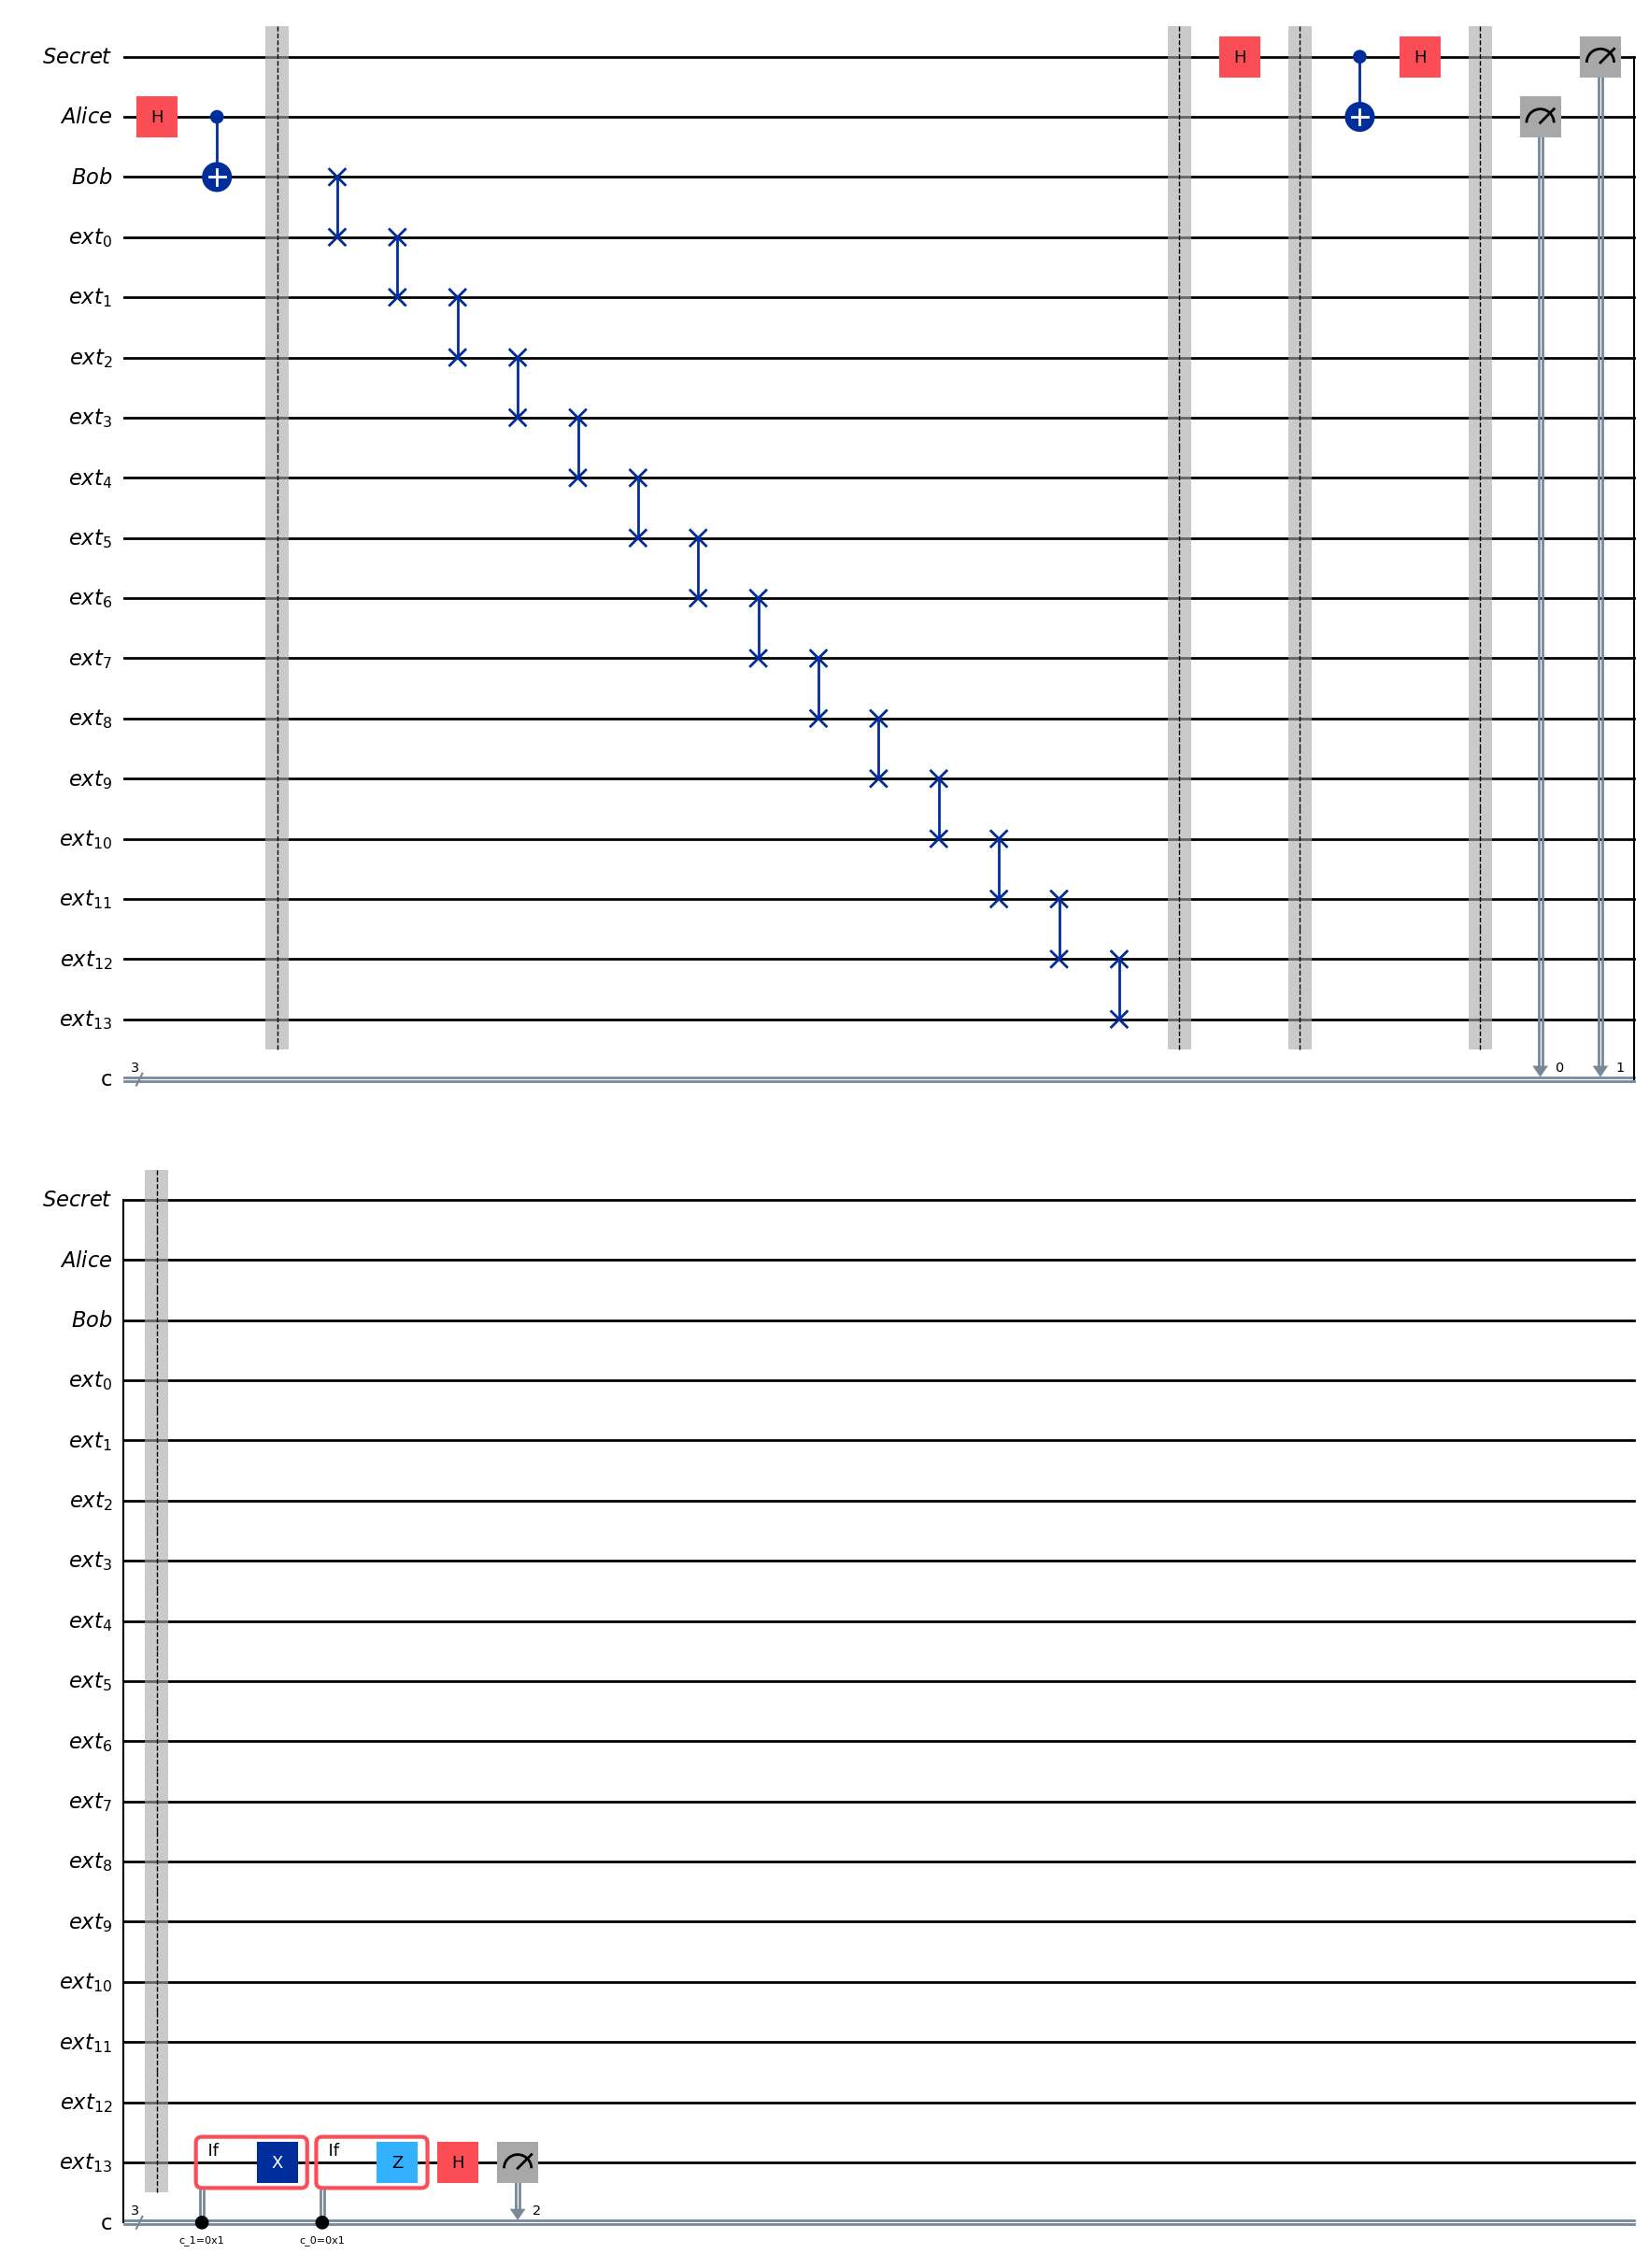


=== Circuito com 13 SWAPs ===


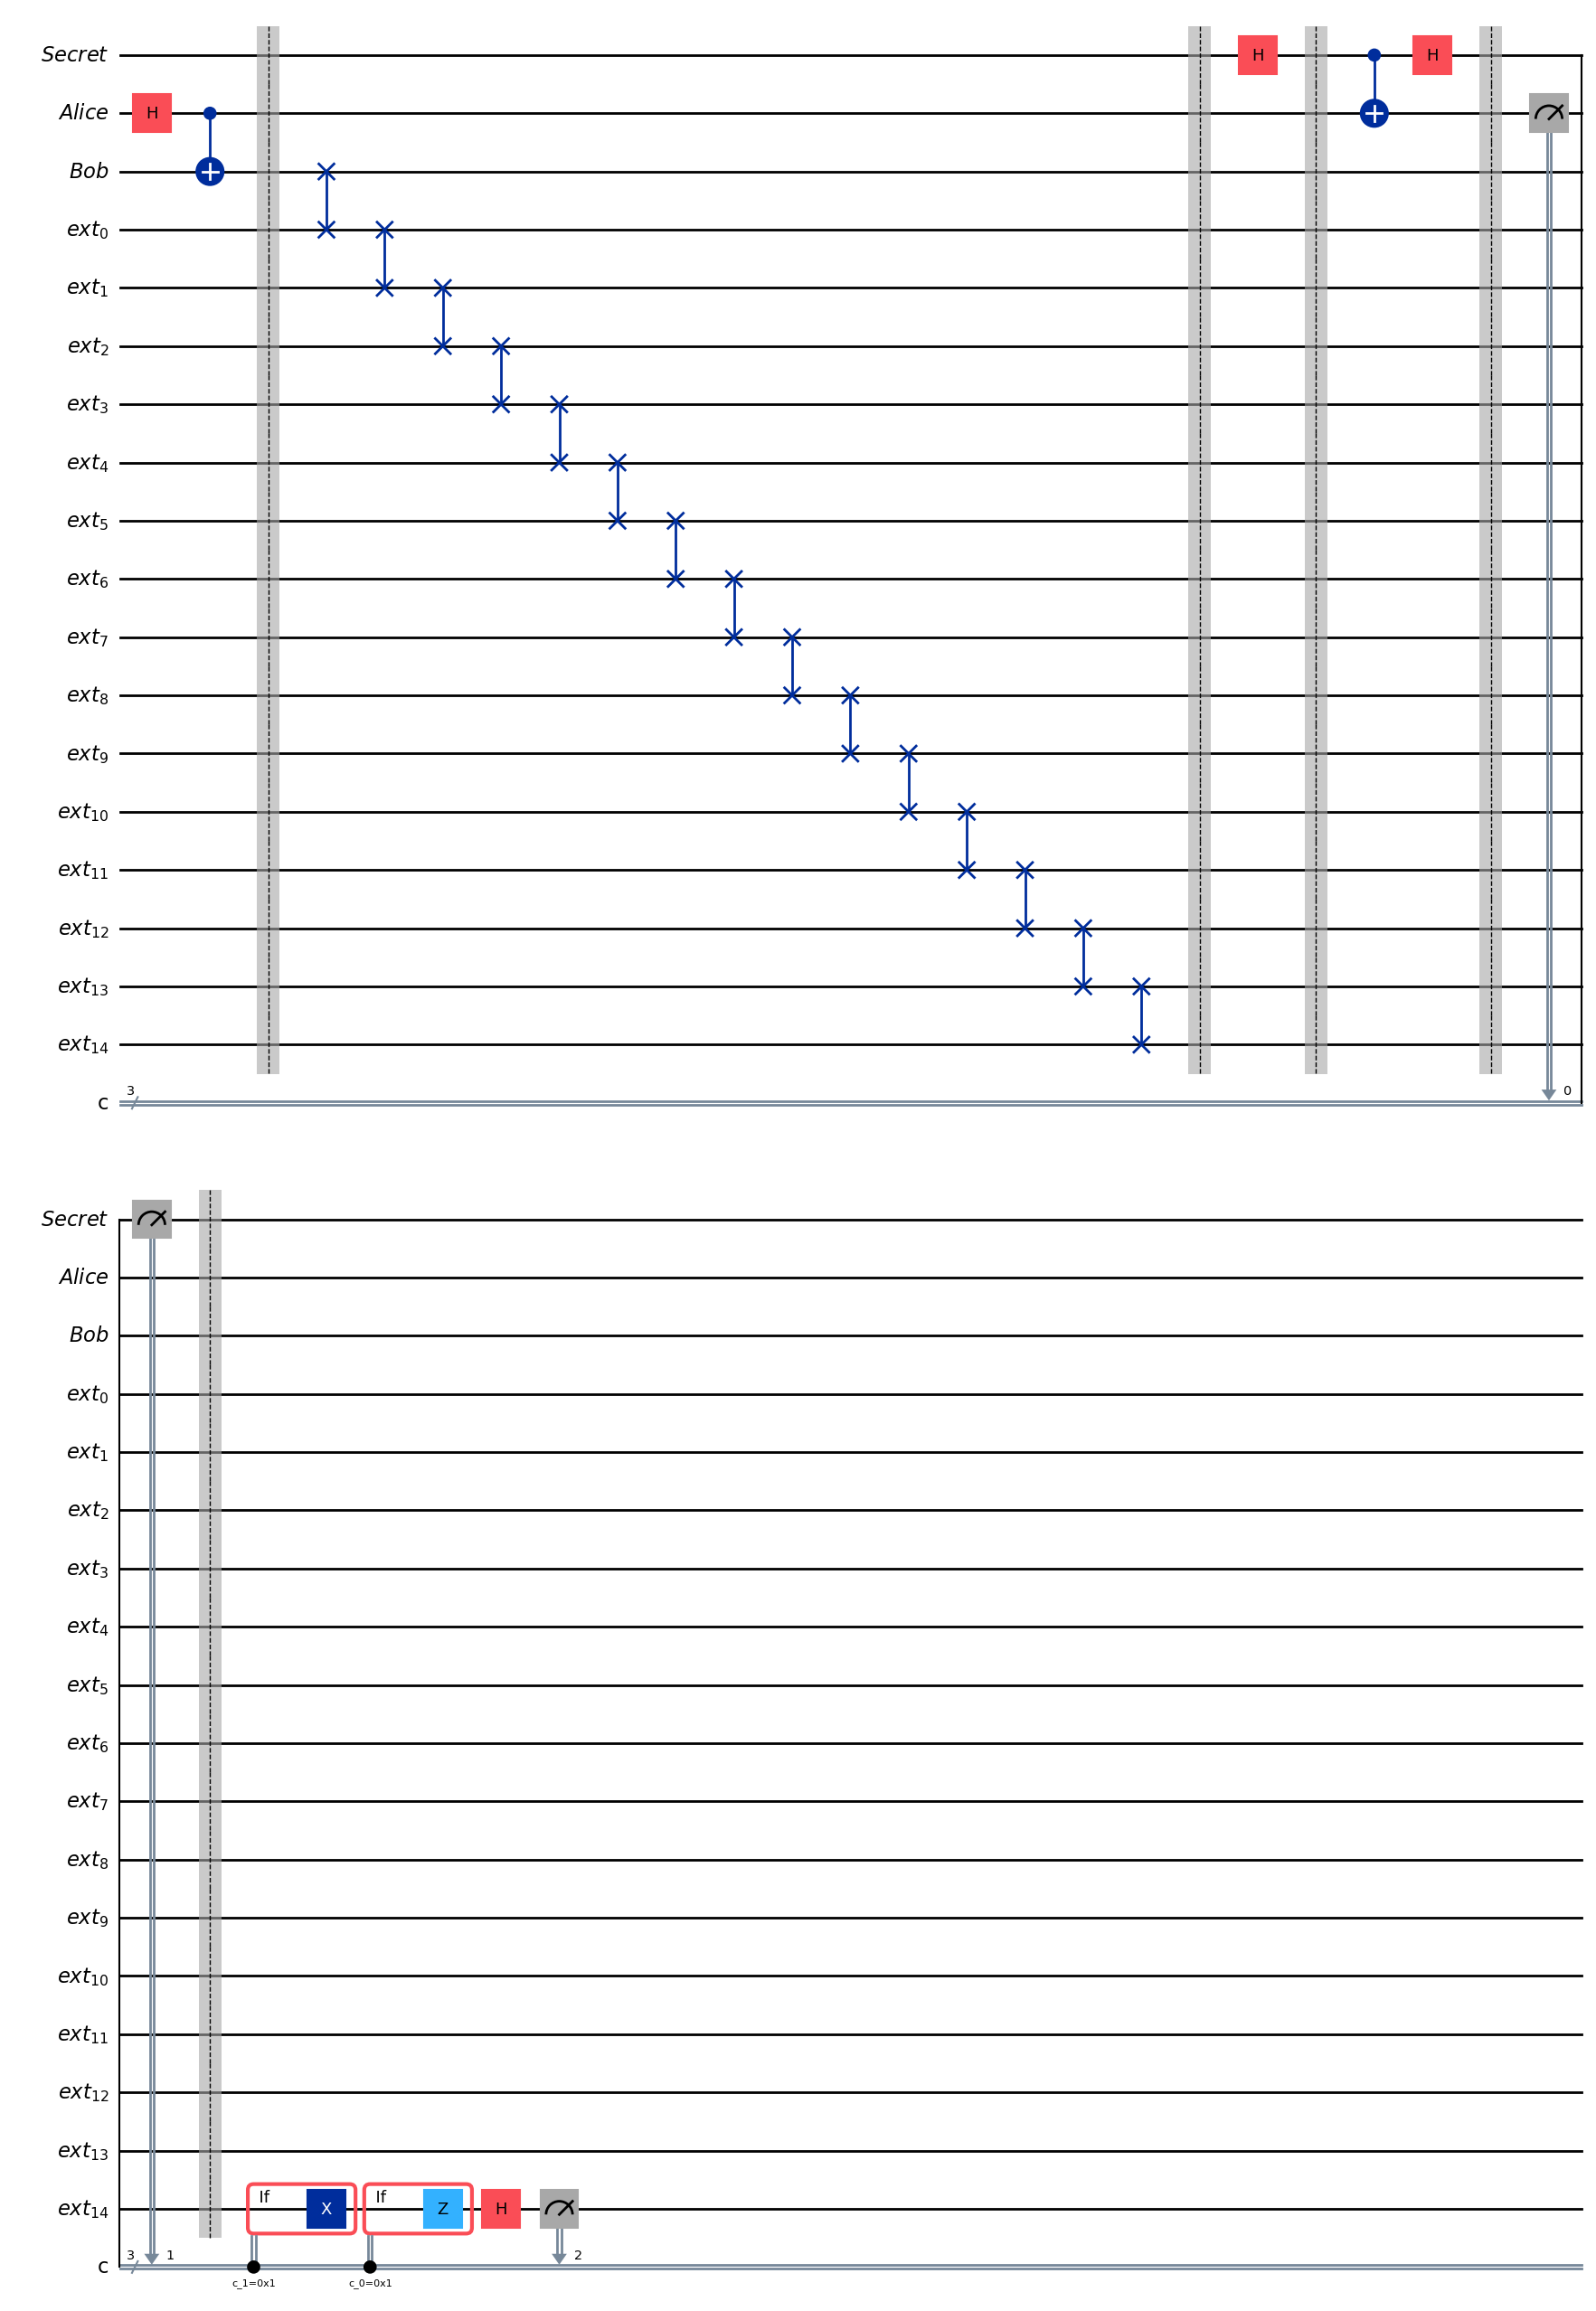


=== Circuito com 14 SWAPs ===


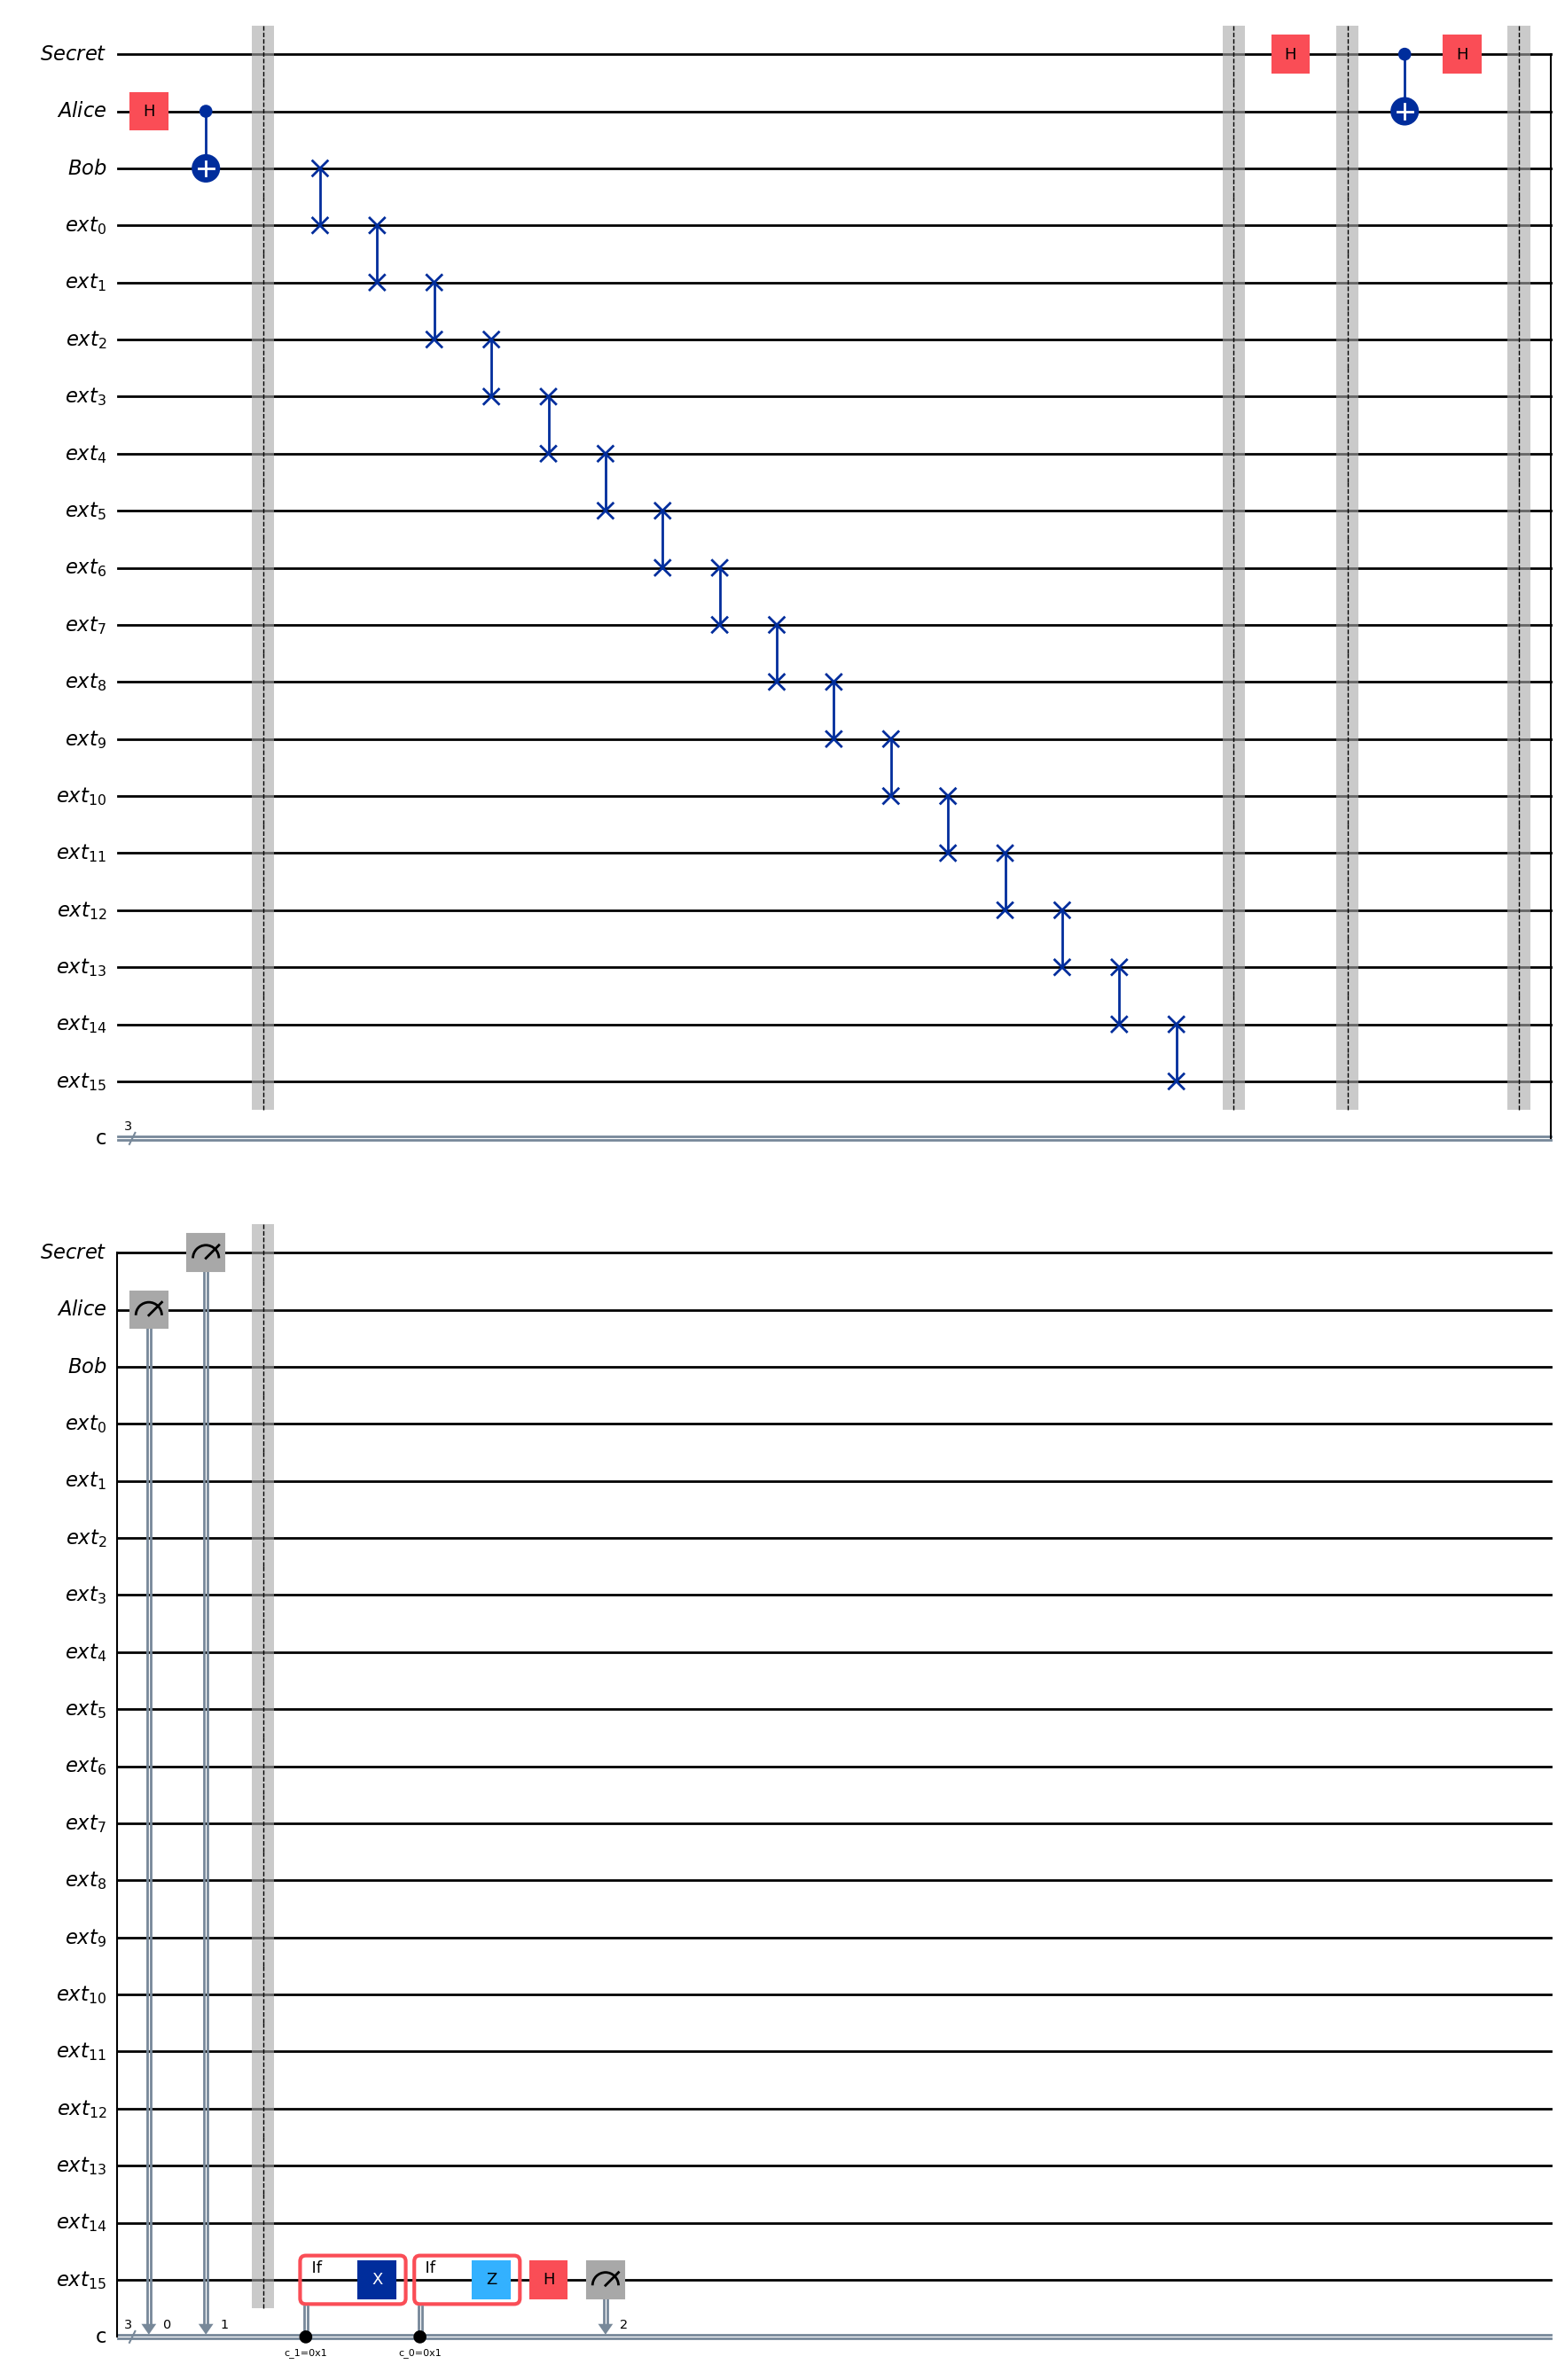


=== Circuito com 15 SWAPs ===


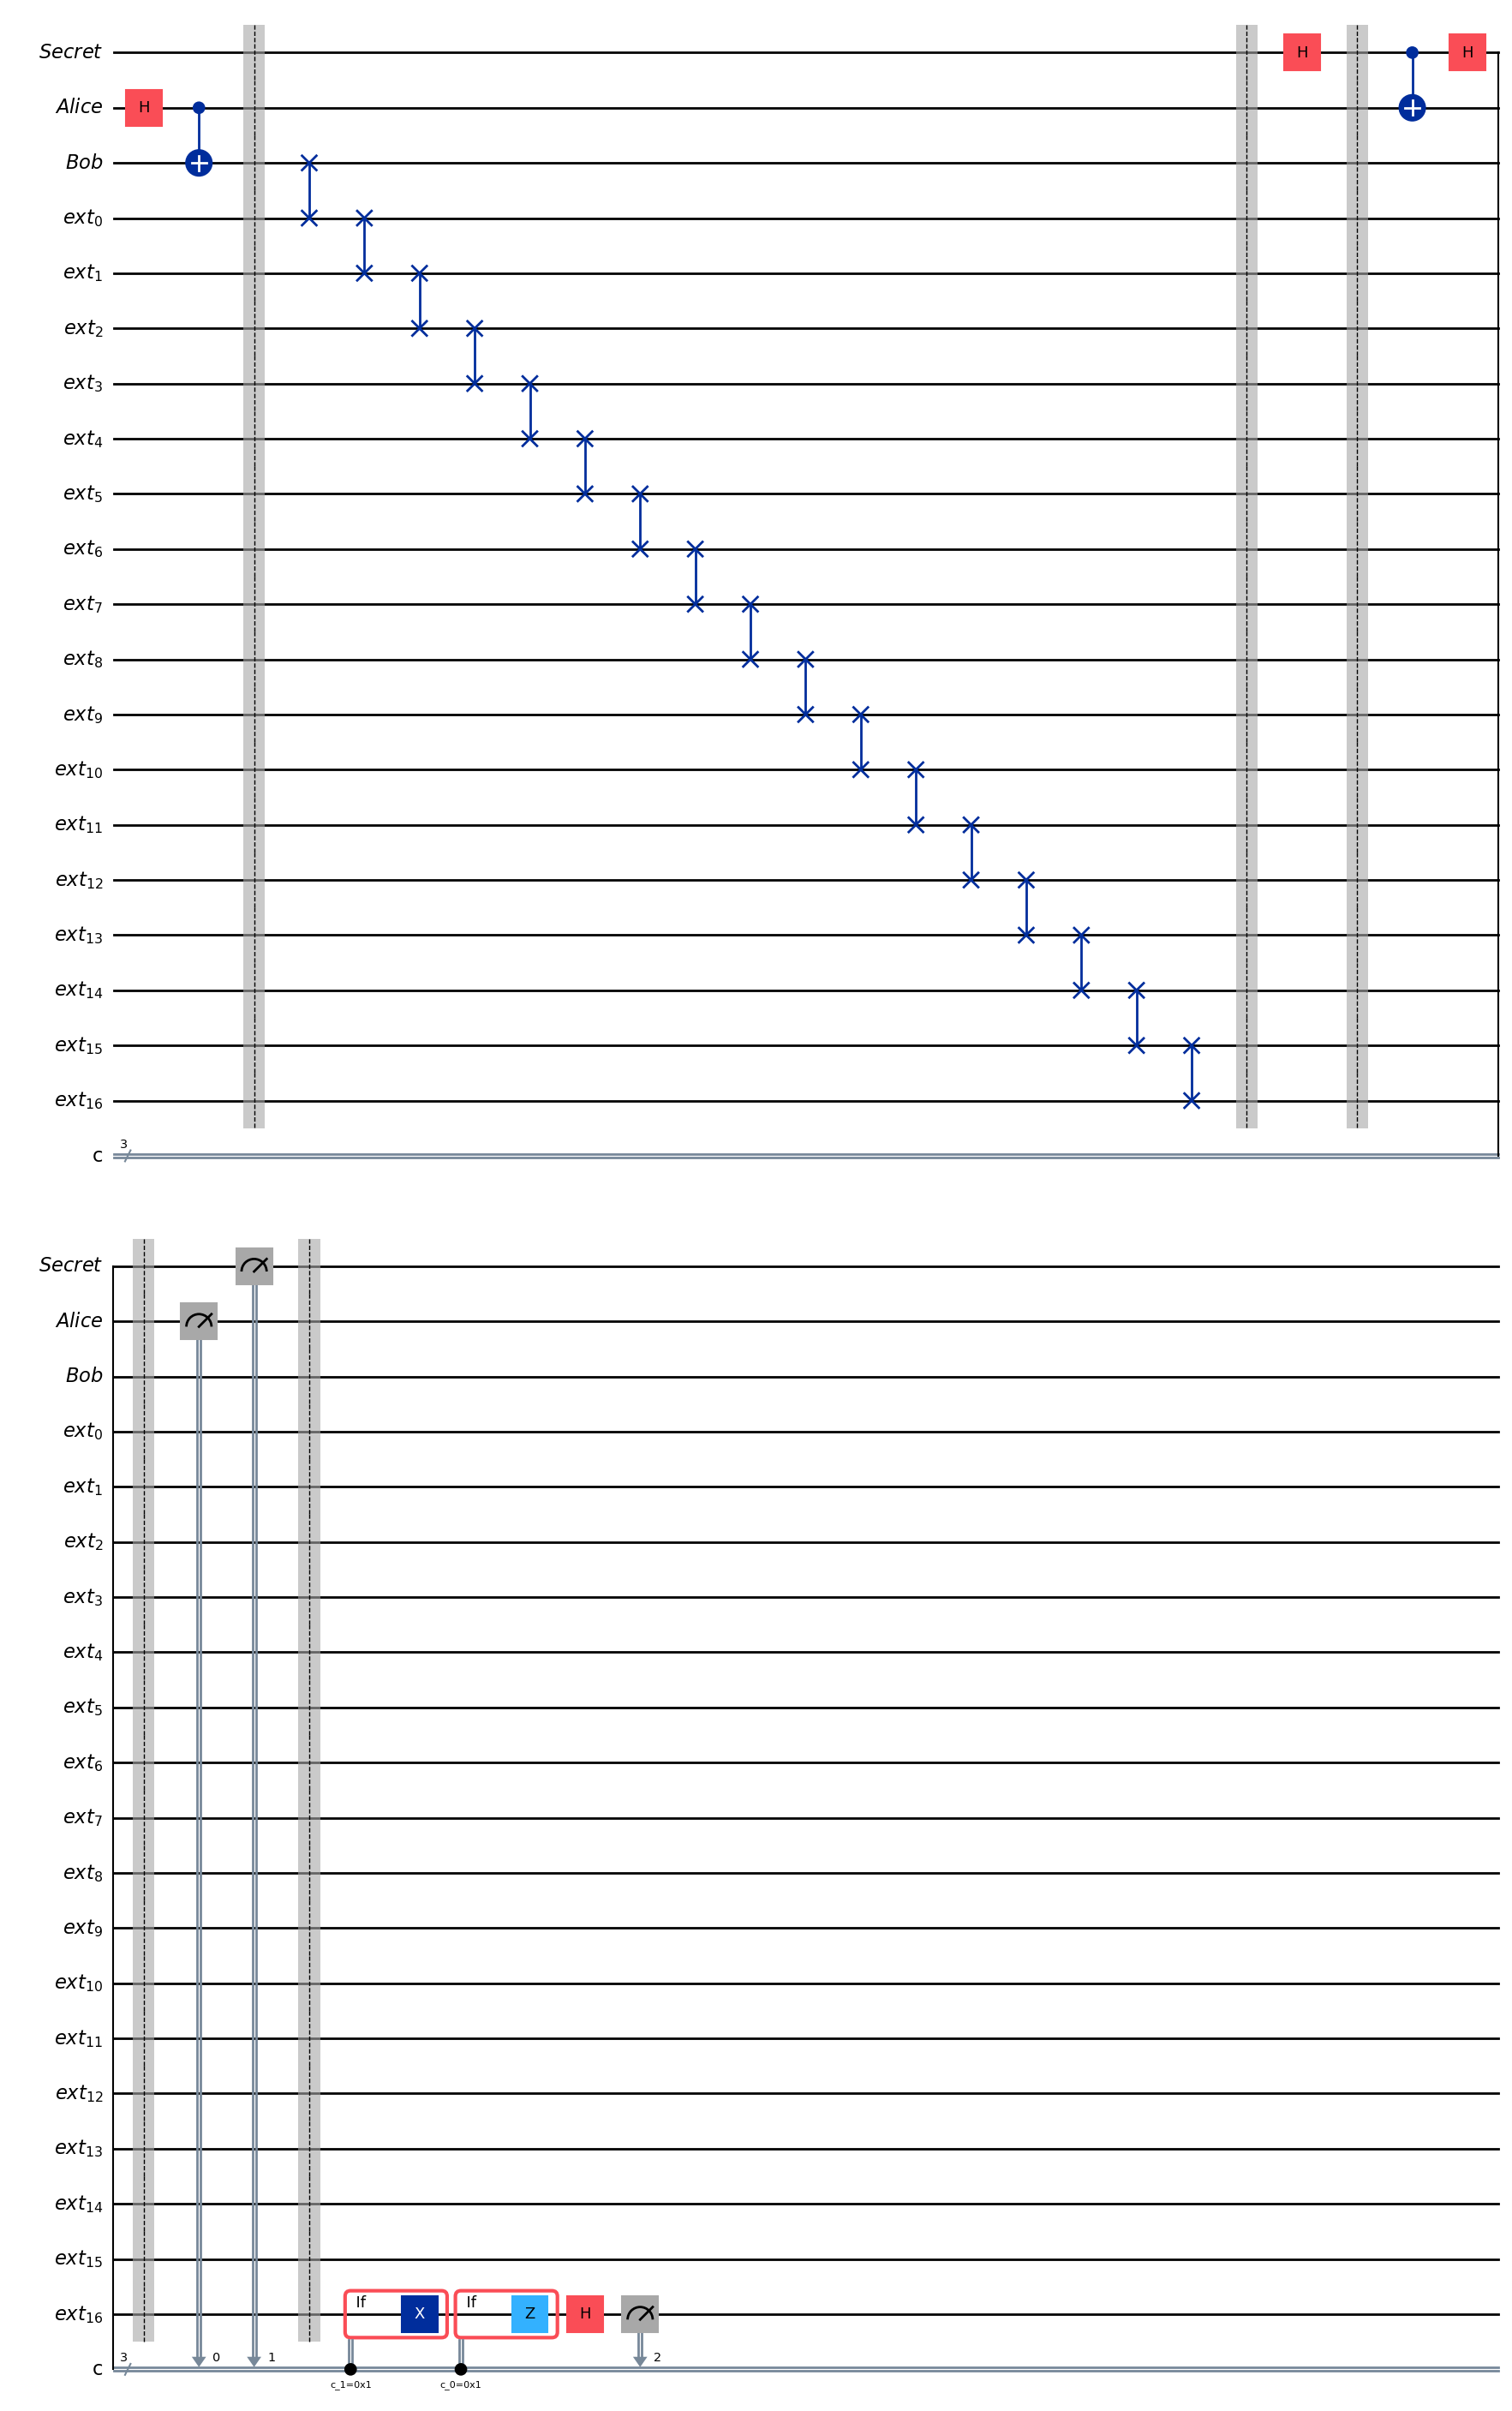


=== Circuito com 16 SWAPs ===


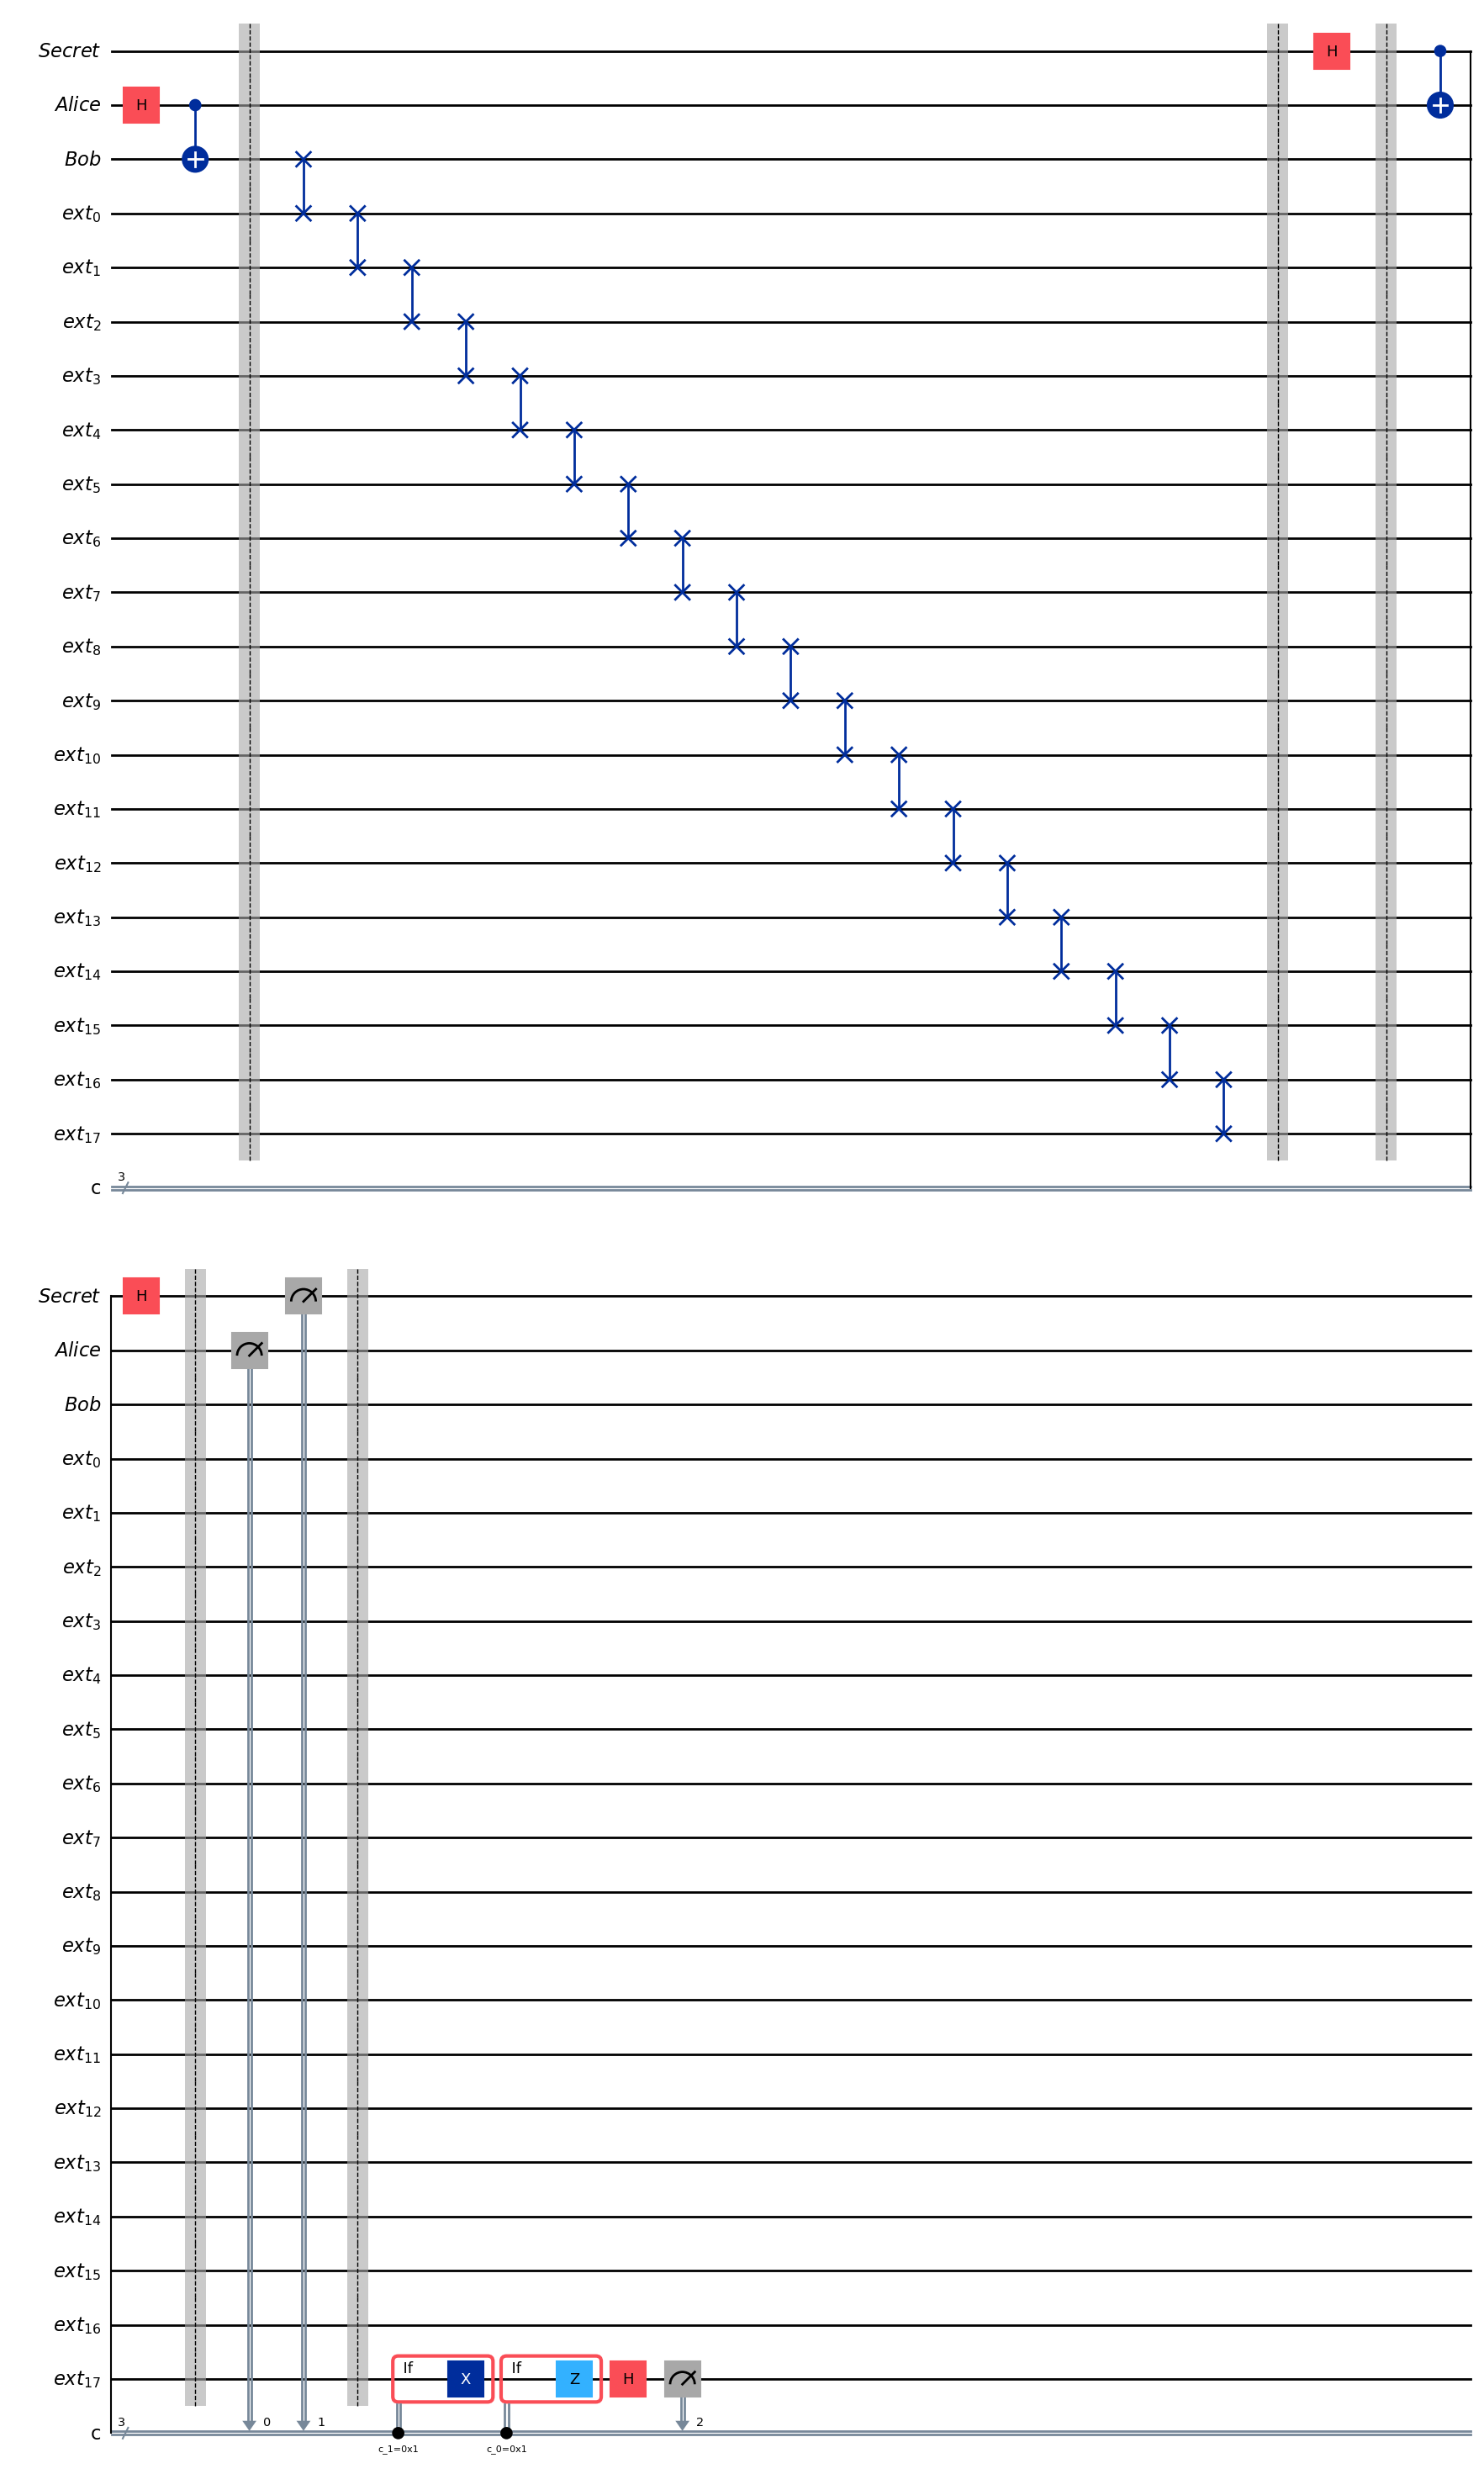


=== Circuito com 17 SWAPs ===


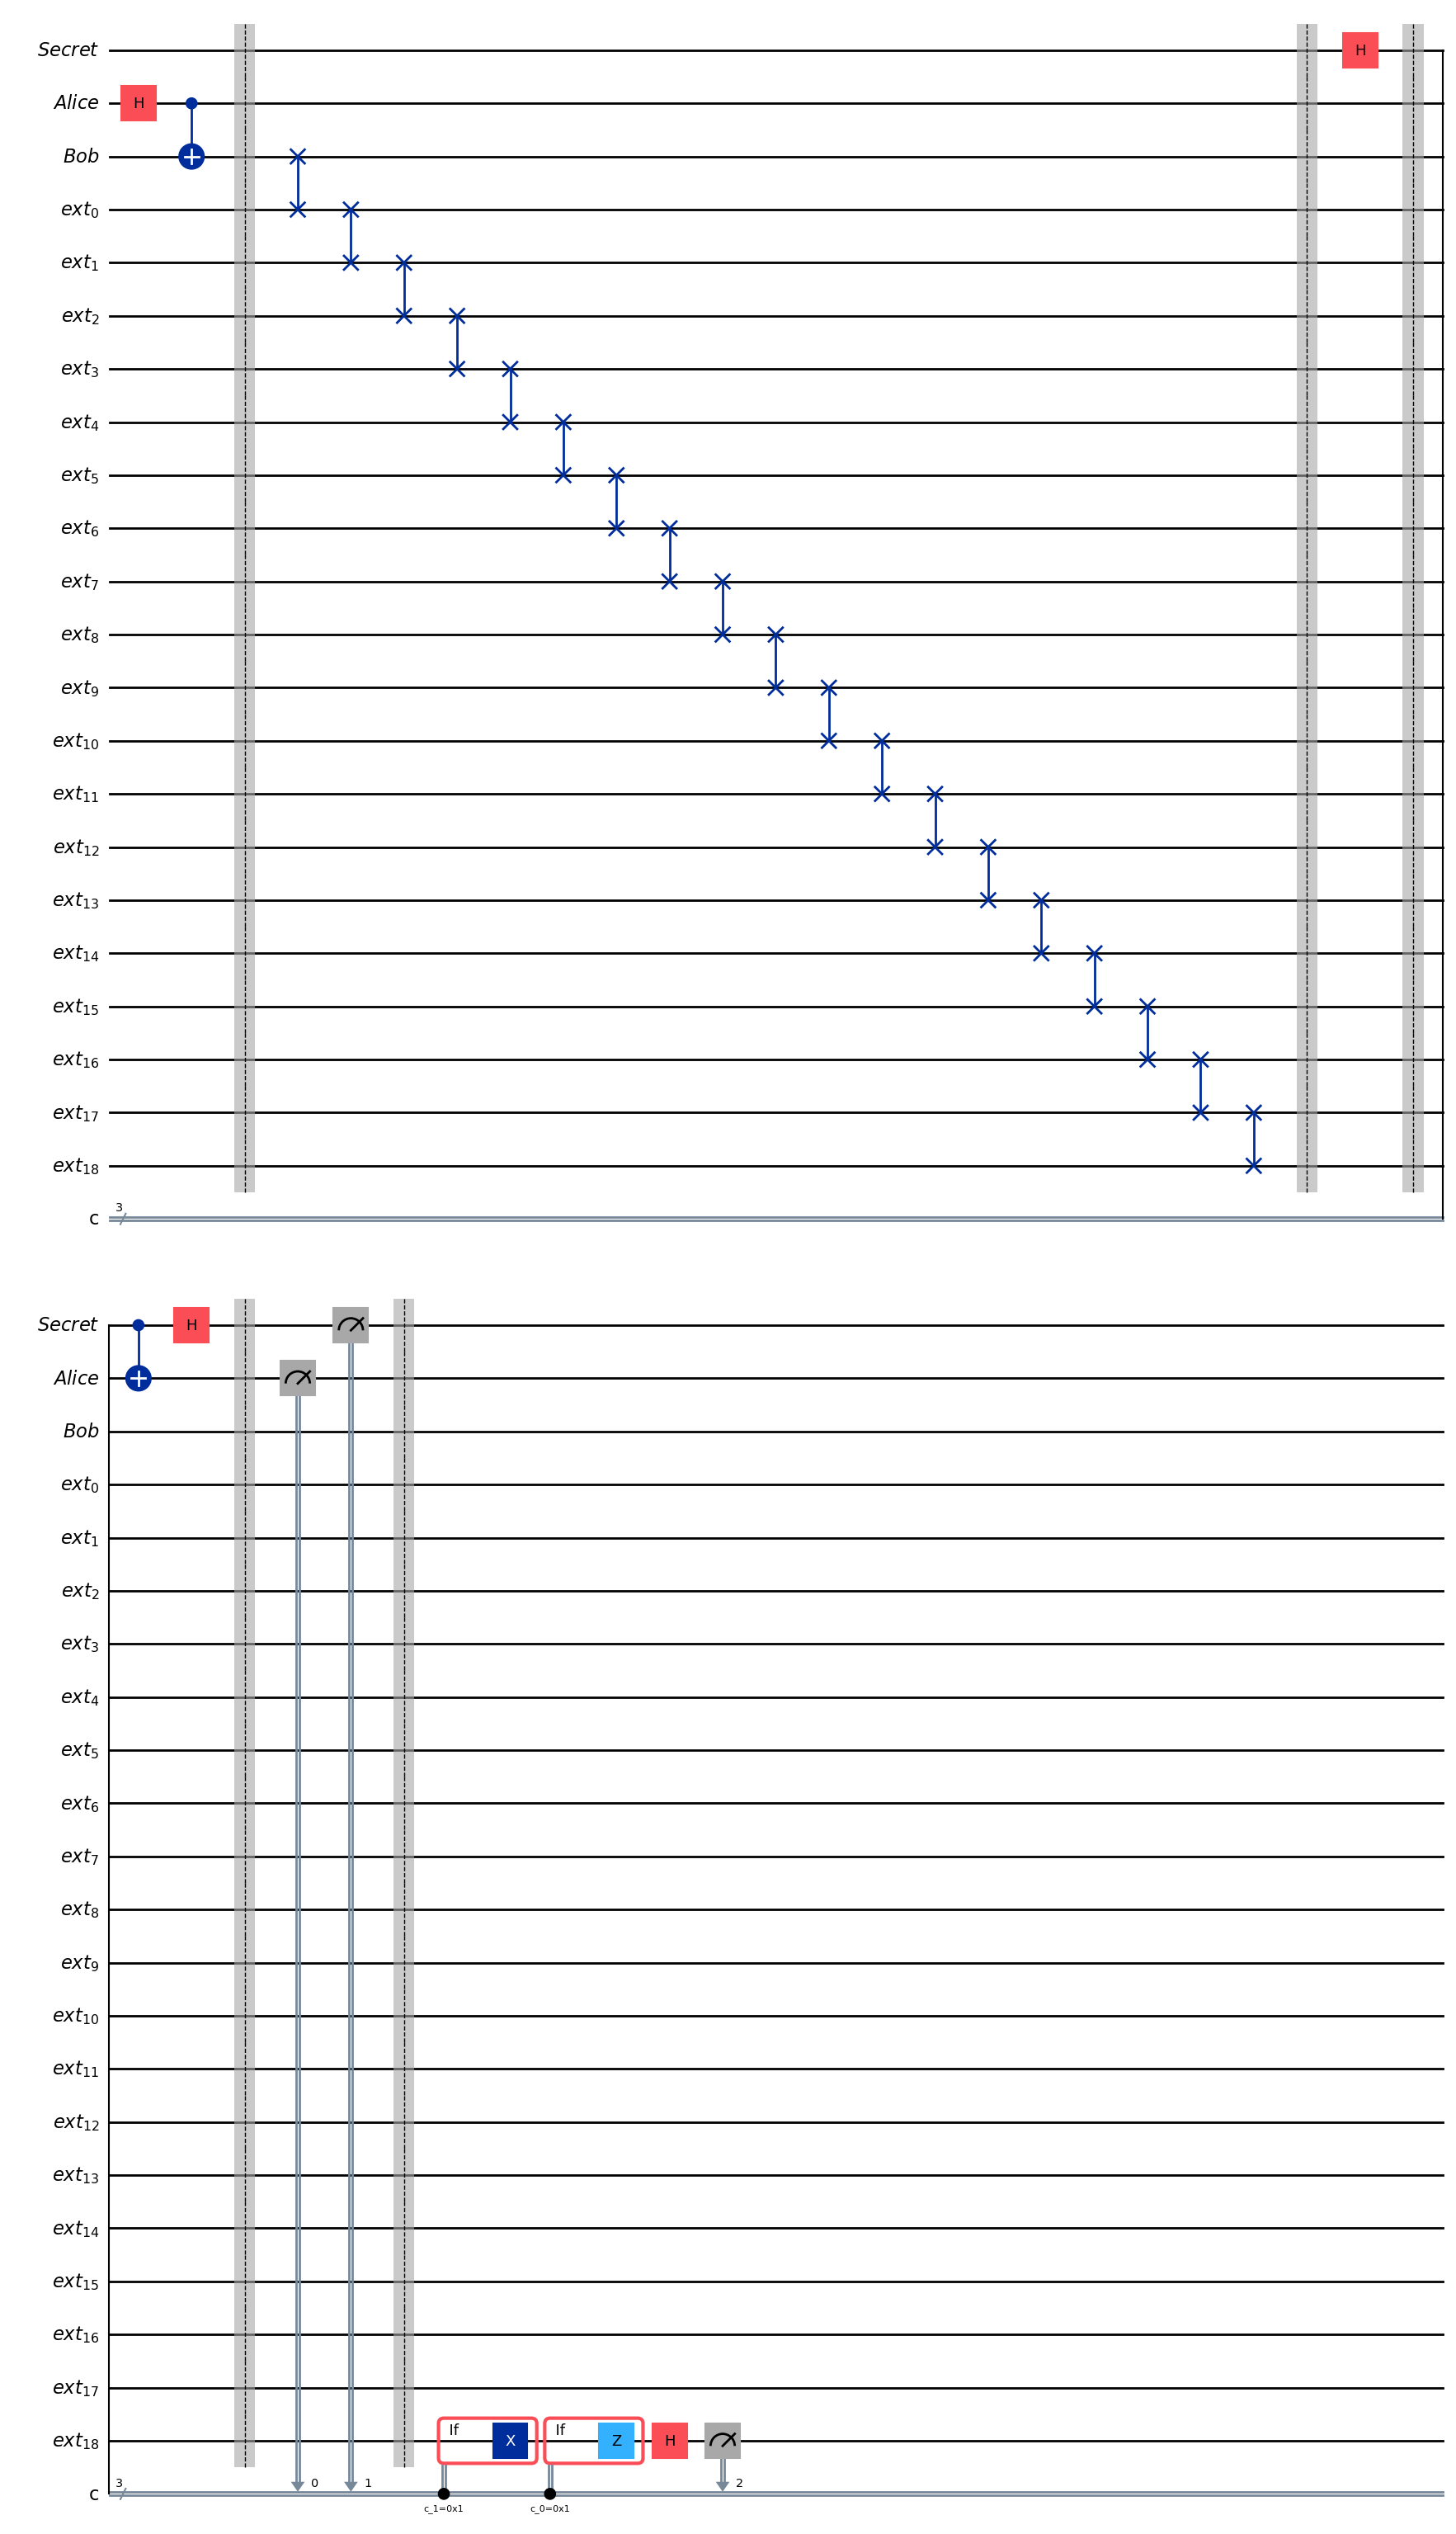


=== Circuito com 18 SWAPs ===


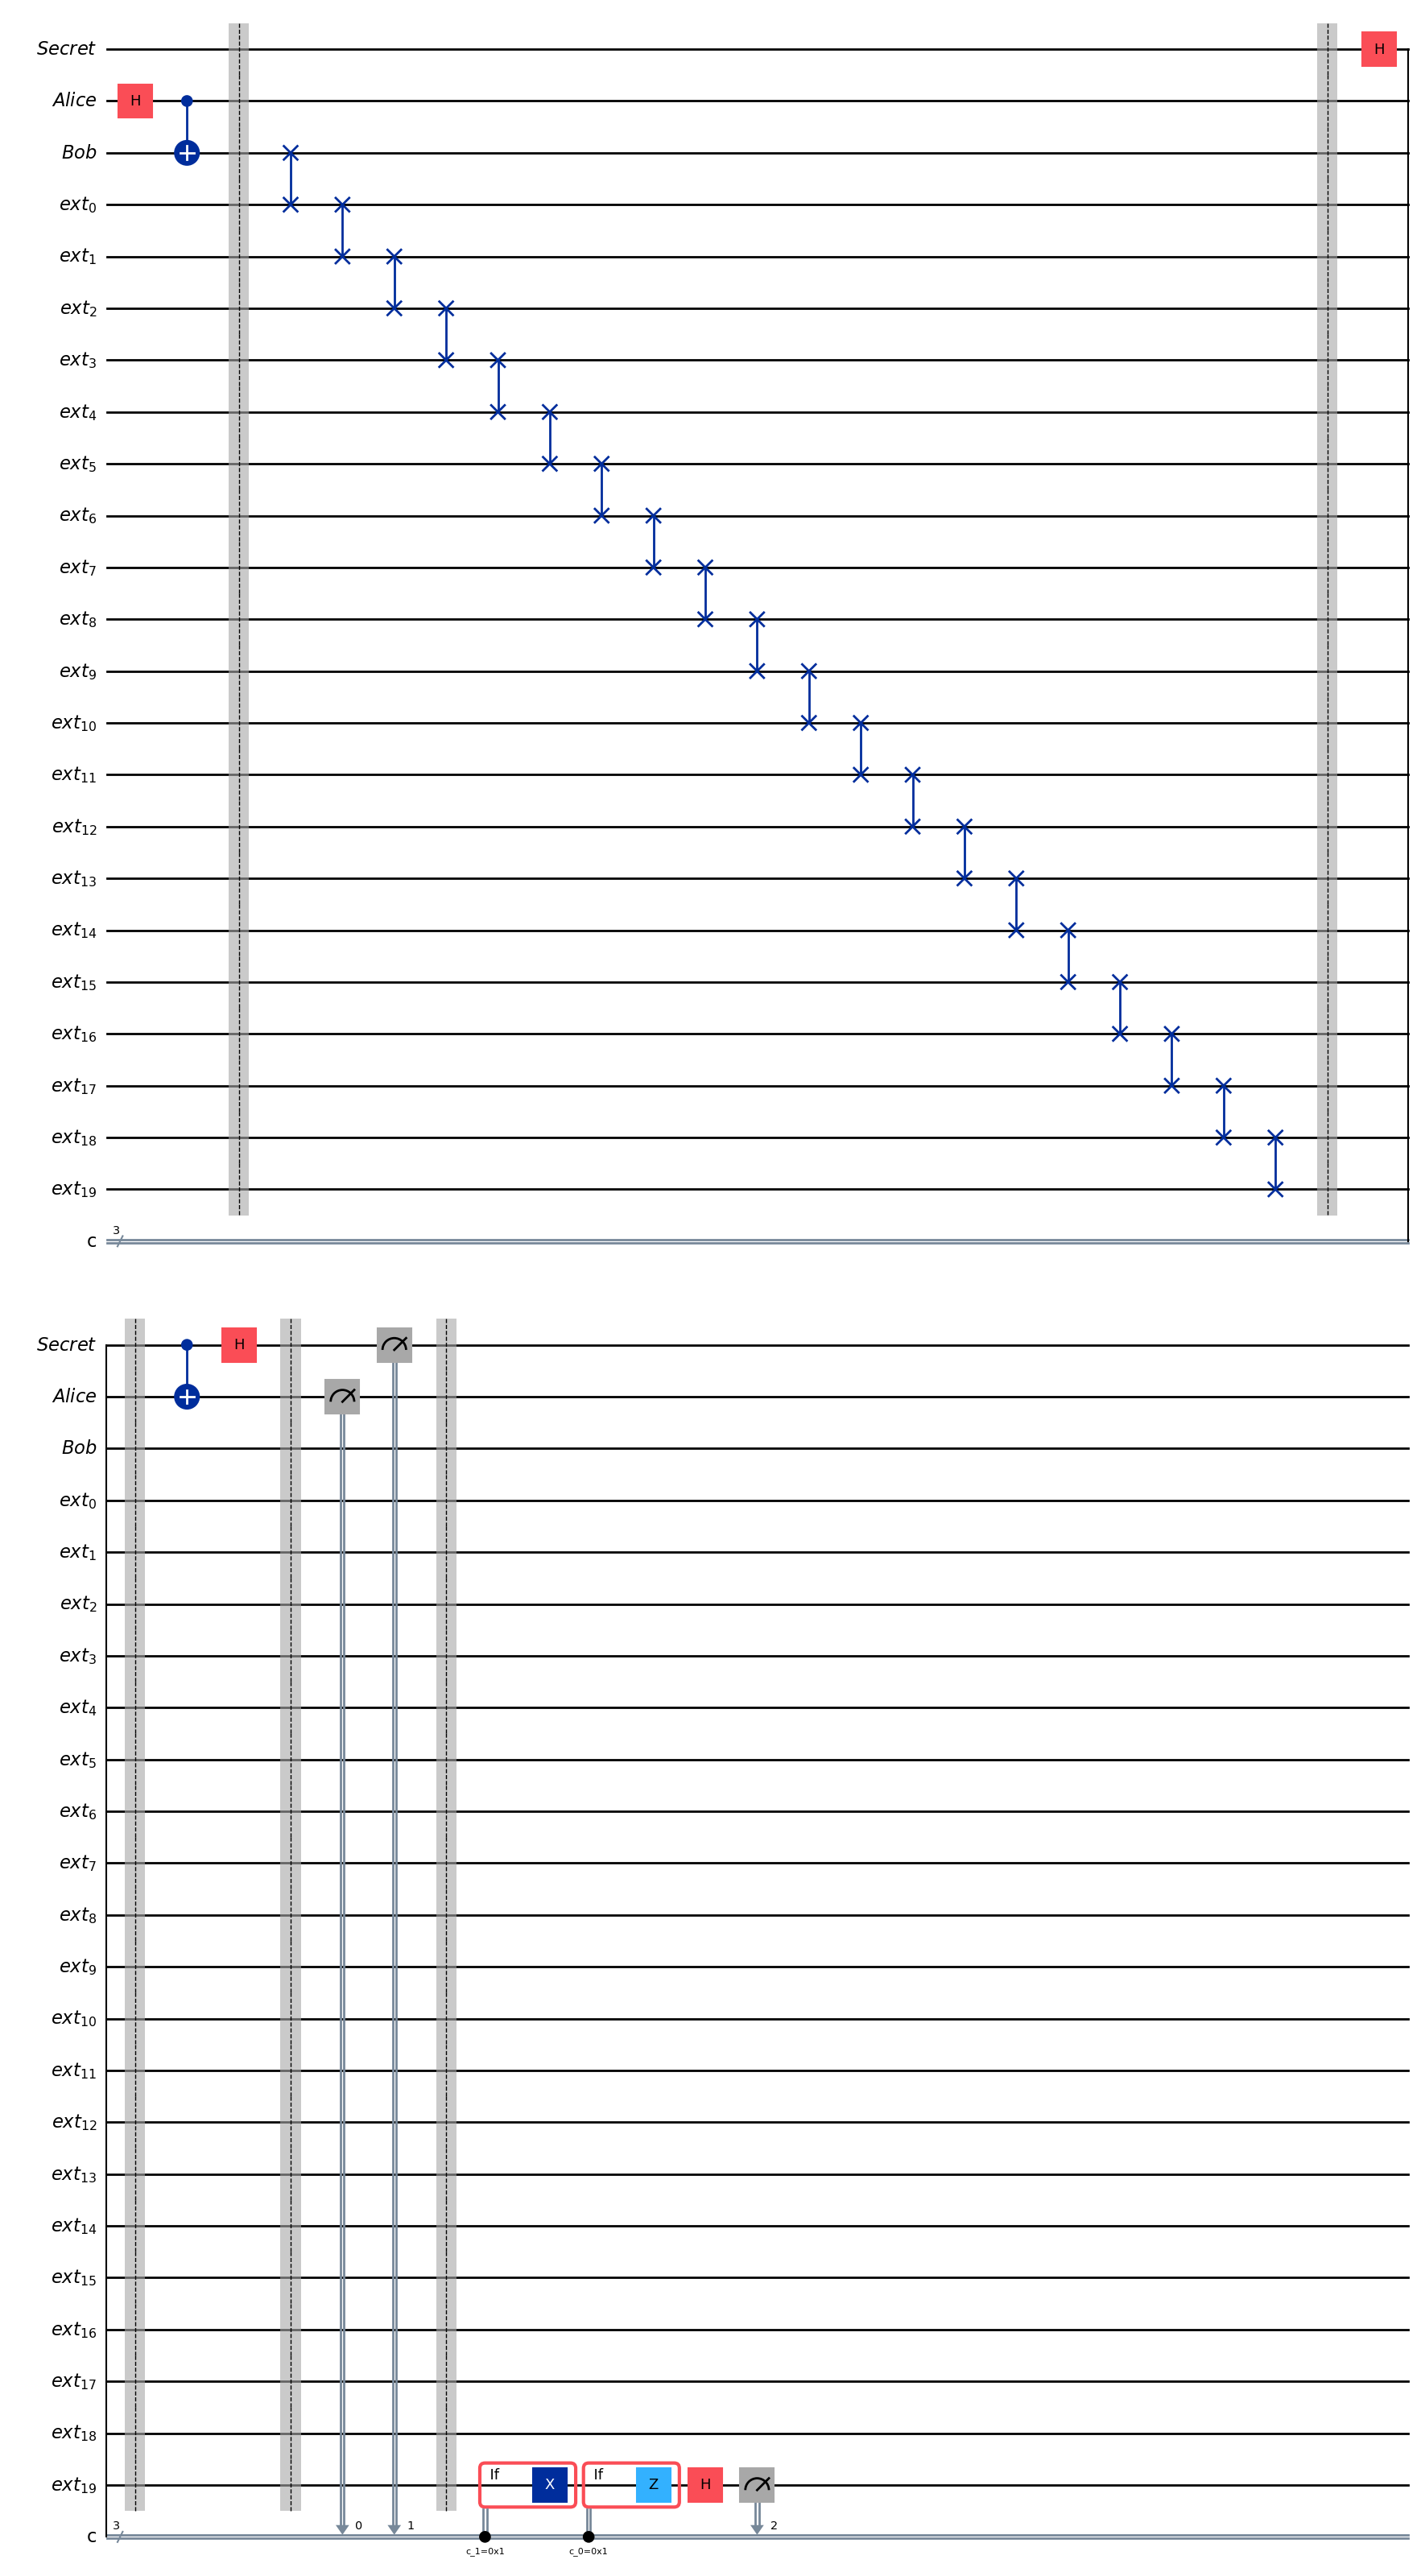

In [3]:
circuit_com_0_swaps = function_teleport(n=0)
circuit_com_1_swaps = function_teleport(n=1)
circuit_com_2_swaps = function_teleport(n=2)
circuit_com_3_swaps = function_teleport(n=3)
circuit_com_4_swaps = function_teleport(n=4)
circuit_com_5_swaps = function_teleport(n=5)
circuit_com_6_swaps = function_teleport(n=6)
circuit_com_7_swaps = function_teleport(n=7)
circuit_com_8_swaps = function_teleport(n=8)
circuit_com_9_swaps = function_teleport(n=9)
circuit_com_10_swaps = function_teleport(n=10)
circuit_com_11_swaps = function_teleport(n=11)
circuit_com_12_swaps = function_teleport(n=12)
circuit_com_13_swaps = function_teleport(n=13)
circuit_com_14_swaps = function_teleport(n=14)
circuit_com_15_swaps = function_teleport(n=15)
circuit_com_16_swaps = function_teleport(n=16)
circuit_com_17_swaps = function_teleport(n=17)
circuit_com_18_swaps = function_teleport(n=18)
circuit_com_19_swaps = function_teleport(n=19)
circuit_com_20_swaps = function_teleport(n=20)

# Também guarda tudo em uma lista para fácil iteração
circuitos = [
    circuit_com_2_swaps,
    circuit_com_3_swaps,
    circuit_com_4_swaps,
    circuit_com_5_swaps,
    circuit_com_6_swaps,
    circuit_com_7_swaps,
    circuit_com_8_swaps,
    circuit_com_9_swaps,
    circuit_com_10_swaps,
    circuit_com_11_swaps,
    circuit_com_12_swaps,
    circuit_com_13_swaps,
    circuit_com_14_swaps,
    circuit_com_15_swaps,
    circuit_com_16_swaps,
    circuit_com_17_swaps,
    circuit_com_18_swaps,
    circuit_com_19_swaps,
    circuit_com_20_swaps,
]

# Printar todos os circuitos
for i, circ in enumerate(circuitos, start=0):
    print(f"\n=== Circuito com {i} SWAPs ===")
    display(circ.draw('mpl'))


#### Definição do backend

In [4]:
backend = AerSimulator()

noise_model = NoiseModel()
erro1 = depolarizing_error(0.01,1)
erro2 = depolarizing_error(0.1,2)
erro3 = depolarizing_error(0.1,2)

noise_model.add_all_qubit_quantum_error(erro1,['h','x','z'])
noise_model.add_all_qubit_quantum_error(erro2,['cx'])
noise_model.add_all_qubit_quantum_error(erro3,['swap'])

#### Plotagem 

c:\Users\ianre\miniconda3\envs\cwq\Lib\site-packages\qiskit\compiler\transpiler.py:269: UserWarning: Providing `coupling_map` and/or `basis_gates` along with `backend` is not recommended, as this will invalidate the backend's gate durations and error rates.
  pm = generate_preset_pass_manager(


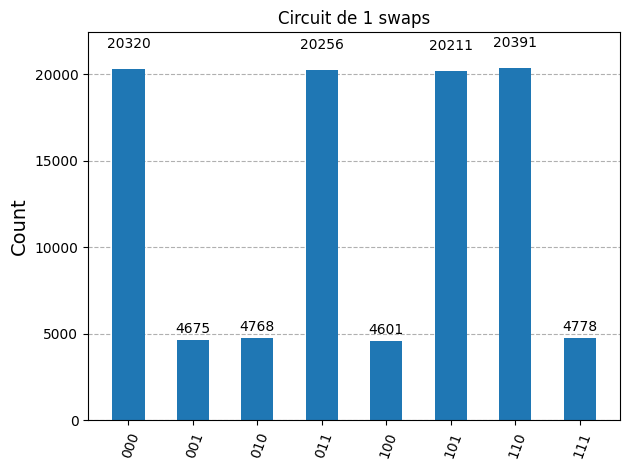

In [5]:
transpiled_swap_1 = transpile(
    circuit_com_2_swaps,
    backend,
    basis_gates=['swap','h','x','z','cx','measure'],
    optimization_level=0
)

result_swap_1 = backend.run(transpiled_swap_1, shots=100000, noise_model=noise_model).result()
counts_swap_1 = result_swap_1.get_counts()

plot_histogram(counts_swap_1,title='Circuit de 1 swaps')

c:\Users\ianre\miniconda3\envs\cwq\Lib\site-packages\qiskit\compiler\transpiler.py:269: UserWarning: Providing `coupling_map` and/or `basis_gates` along with `backend` is not recommended, as this will invalidate the backend's gate durations and error rates.
  pm = generate_preset_pass_manager(


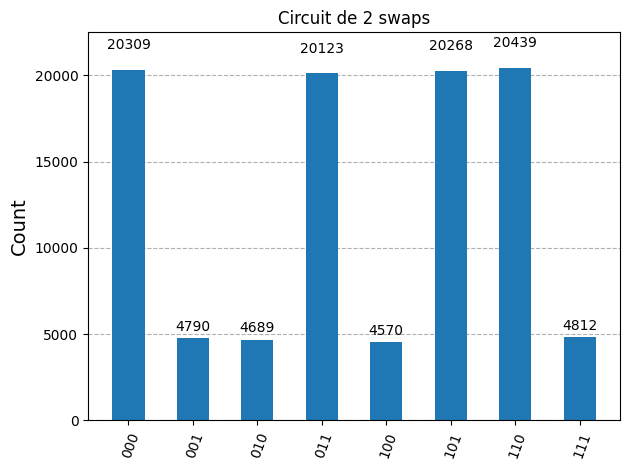

In [6]:
transpiled_swap_2 = transpile(
    circuit_com_2_swaps,
    backend,
    basis_gates=['swap','h','x','z','cx','measure'],
    optimization_level=0
)


result_swap_2 = backend.run(transpiled_swap_2, shots=100000, noise_model=noise_model).result()
counts_swap_2 = result_swap_2.get_counts()

plot_histogram(counts_swap_2,title='Circuit de 2 swaps')

c:\Users\ianre\miniconda3\envs\cwq\Lib\site-packages\qiskit\compiler\transpiler.py:269: UserWarning: Providing `coupling_map` and/or `basis_gates` along with `backend` is not recommended, as this will invalidate the backend's gate durations and error rates.
  pm = generate_preset_pass_manager(


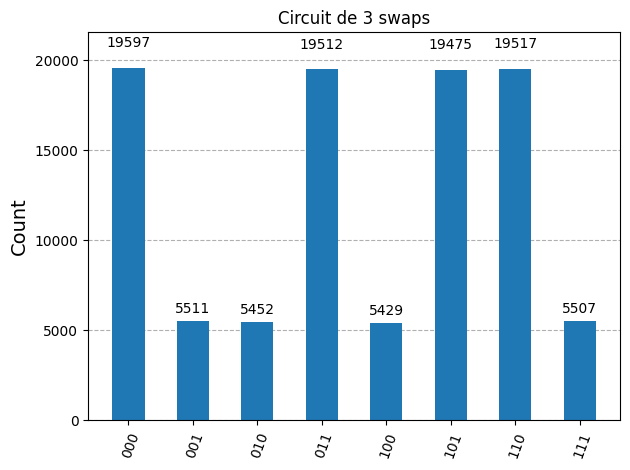

In [7]:
transpiled_swap_3 = transpile(
    circuit_com_3_swaps,
    backend,
    basis_gates = ['swap','h','x','z','cx','measure'],
    optimization_level = 0
)

result_swap_3 = backend.run(transpiled_swap_3, shots=100000, noise_model=noise_model).result()
counts_swap_3 = result_swap_3.get_counts()

plot_histogram(counts_swap_3,title='Circuit de 3 swaps')

c:\Users\ianre\miniconda3\envs\cwq\Lib\site-packages\qiskit\compiler\transpiler.py:269: UserWarning: Providing `coupling_map` and/or `basis_gates` along with `backend` is not recommended, as this will invalidate the backend's gate durations and error rates.
  pm = generate_preset_pass_manager(


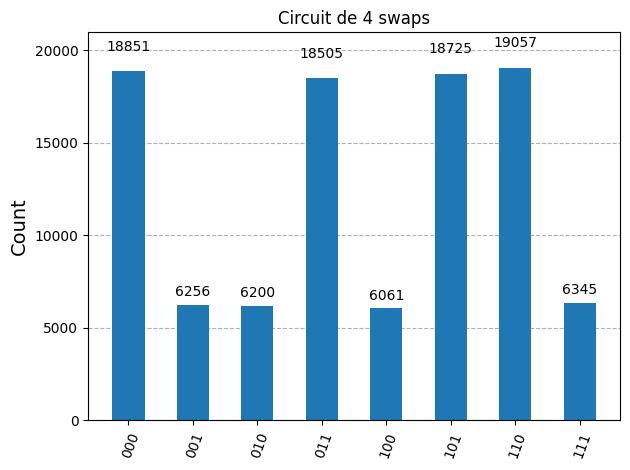

In [8]:
transpiled_swap_4 = transpile(
    circuit_com_4_swaps,
    backend,
    basis_gates=['swap','h','x','z','cx','measure'],
    optimization_level=0
)


result_swap_4 = backend.run(transpiled_swap_4, shots=100000, noise_model=noise_model).result()
counts_swap_4 = result_swap_4.get_counts()

plot_histogram(counts_swap_4,title='Circuit de 4 swaps')